## Problem Statement 

 Predicting high-risk customers who are likely to churn for the banking industry

 A  bank is struggling to maintain its strong foothold in the local market due to: 

     * Rapidly increasing customer churn which leads to revenue loss for the bank
     * The decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share. 
     * Bank want to retain customer to stop revenue loss

#### Data Source : Kaggle

## Data Description :
 * RowNumber : Row number
 * CustomerId : Unique Customer ID 
 * Surname: Last Name of the Customer
 * CreditScore: Credit score of the customer
 * Geography:  Country of the customer
 * Gender: Gender of the customer
 * Age: Current age of the customer
 * Tenure: No. Of years customer with the bank
 * Balance: Account balance of the customers
 * NumOfProduct: Number of the products used by customer with the bank
 * HasCrCard: Customer owns credit card or not
 * isActiveMember: Customer is active member ( Interaction with App/Web Bank Application)
 * Estimated Salary: Salary of the customers
 * Exited: Yes if customer churned else no

## Contents :
 * Loading of dataset, libraries and basic statistics of the data
 * EDA 
 * Data Preprocessing  
     * Removal of columns
     * Encoding of Categorical Varibales
 * Predictive Modeling 
   * Testing different balancing techniques (on Logistic Regression)
   * Function to evaluate classifier (Reduce code size and increase reusability of the code)
   * Random Forest 
   * Hyperparameter tunning of Random Forest
   * Boosting model comparision  : XGBoost,CatBoost, LightGBM
   * Hyperparameter tunning of Boosting model
   * Hyperparameter tunning of boosting models
   * Model interpretability using SHAP (SHapley Additive exPlanations)
   * Understanding model prediction
   * Sample prediction from model
   * Efficient probablity Threshold Cut-off for better recall




In [31]:
# Imorting all the necessary libraries 

### Basic Data Manupulation libraries
import pandas as pd 
import numpy as np

###  Data Visualization libraries

import seaborn as sns 
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

###  Modeling and data preprocessing libraries
from sklearn.linear_model  import  LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,roc_curve, roc_auc_score
from scipy.stats import chi2_contingency



### Model interpretability library
import shap

## Extras 
import pickle as pk ## To save model / variables
from copy import deepcopy
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import os
import warnings
warnings.filterwarnings("ignore")
print("All libraries sucessfully loaded ")

All libraries sucessfully loaded 


In [32]:
## Loading the dataset 
df=pd.read_csv(r"Data\Bank_data.csv")
df.head()
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [33]:
## Shape of the data
df.shape
# %%

(10000, 14)

In [34]:
## Checking column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
# Describe 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
## Checking null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## EDA

In [37]:
## Plotting pie char to understand % of customer exited 
labels = ["Current Customers","Exited Customers"]
values = list(df["Exited"].value_counts()[0:2])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels,textinfo='label+percent', values=values, pull=[0, 0.2])])
if not os.path.exists("plot_images"):
    os.mkdir("plot_images")


fig.show()
# print styling
s1 = '\033[1m' + '\033[96m'
s2 = '\033[1m' + '\033[4m' + '\033[95m'
h1 = '\033[1m' + '\033[4m' + '\033[92m'
e = "\033[0;0m"


In [38]:
fig = px.histogram(df, x="CreditScore", color="Exited", color_discrete_map={"Exited":"#ffc8dd"}, nbins=60, title="Impact of Credit score on customer churn rate")


fig.update_layout(
    title="Impact of Credit score on customer churn rate",
    xaxis_title="Credit Score",
    yaxis_title="Count",
    legend_title="Exited",
)

fig.show()

print(h1 + "Finding:" + e + s1 + "Credit score in general does not have an impact on the churn rate, but in the grpah we can see that Credit score and Churn rate are normally distributed and the maximum population have credit score between 600-700 and this population has highest churn rate as well. Also we can see that churn rate is directely proportional to population. Greater the population in the bin greatr is the churn rate" + e)

# %%

Finding:Credit score in general does not have an impact on the churn rate, but in the grpah we can see that Credit score and Churn rate are normally distributed and the maximum population have credit score between 600-700 and this population has highest churn rate as well. Also we can see that churn rate is directely proportional to population. Greater the population in the bin greatr is the churn rate


In [39]:
#2 Balance vs churn rate

fig = px.box(df, x="Balance", color="Exited", color_discrete_map={"Exited":"#ffc8dd"}, title="Impact of Balance on churn rate")

fig.update_layout(
    title="Impact of Customer Balance on churn rate",
    xaxis_title="Customer Balance",
    yaxis_title="Count",
    legend_title="Exited"
    
)

fig.show()

print(h1 + "Finding:" + e + s1 + "From the graph we can see that people with higher balance tend to churn more than the one with the low balance." + e)


Finding:From the graph we can see that people with higher balance tend to churn more than the one with the low balance.


In [40]:
#3 Estimated salary vs churn rate

fig = px.box(df, x="EstimatedSalary", color="Exited", color_discrete_map={"Exited":"#ffc8dd"})

fig.update_layout(
    title="Impact of Salary on churn rate",
    xaxis_title="Estimated Salary",
    yaxis_title="Count",
    legend_title="Exited"
)

fig.show()

print(h1 + "Finding:" + e + s1 + "From the graph we can see that Estimated Salary does not have much effect on the customer churn rate the difference is very minute. " + e)

# %%

Finding:From the graph we can see that Estimated Salary does not have much effect on the customer churn rate the difference is very minute. 


In [41]:
#4 Age vs churn rate

fig = px.histogram(df, x="Age", color="Exited", color_discrete_map={"Exited":"#ffc8dd"})

fig.update_layout(
    title="Impact of Age on customer churn rate",
    xaxis_title="Age",
    yaxis_title="Count",
    legend_title="Exited"
)

fig.show()

print(h1 + "Finding:" + e + s1 + "The graph is right skewed for the reatined customer, but the graph looks slightly normal for the exited customers. It can be seen that customer tend to churn more between the age of 40-60." + e)


Finding:The graph is right skewed for the reatined customer, but the graph looks slightly normal for the exited customers. It can be seen that customer tend to churn more between the age of 40-60.


In [42]:
# Separate each country from Dataset
geo = df['Geography']
F = df[df['Geography'] == 'France']
G = df[df['Geography'] == 'Germany']
S = df[df['Geography'] == 'Spain']


In [43]:
# General description of countries
df['Geography'].describe()


count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [44]:
churn = df['Geography']
churn.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

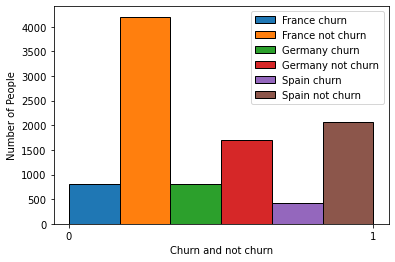

In [45]:
# Distribution of each country in the dataset 

# Separate each country into churn and not churn
churnF = F[F['Exited'] == 1]
notchurnF = F[F['Exited'] == 0]
churnG = G[G['Exited'] == 1]
notchurnG = G[G['Exited'] == 0]
churnS = S[S['Exited'] == 1]
notchurnS = S[S['Exited'] == 0]

#height = [1500,2000,2500,3000,3500,4000,4500,5000,5500]

plt.xticks(np.arange(0,1.1, step=1))
plt.hist([churnF['Exited'],notchurnF['Exited'],churnG['Exited'],notchurnG['Exited'],churnS['Exited'],notchurnS['Exited']], 
        label=['France churn','France not churn','Germany churn','Germany not churn','Spain churn','Spain not churn'],
        histtype = 'bar', rwidth = 1,bins=[0, 1],edgecolor = 'black')
plt.xlabel('Churn and not churn')
plt.ylabel('Number of People')
plt.legend(loc = 0)
plt.savefig('Country churn.png')
plt.show()



In [46]:
# Numbers of churn by country
print('Total Numbers of France customers churned',len(churnF))
print('Total Numbers of Germany customers churned',len(churnG))
print('Total Numbers of Spain customers churned',len(churnS))


Total Numbers of France customers churned 810
Total Numbers of Germany customers churned 814
Total Numbers of Spain customers churned 413


In [47]:
# Churn rate of each country
print('France churn rate',round(len(churnF)/len(F)*100,2))
print('Germany churn rate',round(len(churnG)/len(G)*100,2))
print('Spain churn rate',round(len(churnS)/len(S)*100,2))


France churn rate 16.15
Germany churn rate 32.44
Spain churn rate 16.67


In [48]:
print('\n')
print('Germany has the highest number of customers churned among all countries with 814 customers churned.')
print('\n')
print('Germany also has the highest churn rate of 32.44%','\n')




Germany has the highest number of customers churned among all countries with 814 customers churned.


Germany also has the highest churn rate of 32.44% 



In [49]:
# %%
## Selecting feature using chi square test
def check_categorical_imp(cust_df,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        print(chi2_contingency(pd.crosstab(cust_df.Exited, cust_df[i]))[1])
        if chi2_contingency(pd.crosstab(cust_df.Exited, cust_df[i]))[1] >= 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col

check_categorical_imp(df,["Geography","Gender","IsActiveMember"])
print("Geography,Gender and is active member features are important for prediction")

3.830317605354266e-66
2.2482100097131755e-26
8.785858269303705e-55
Geography,Gender and is active member features are important for prediction


In [50]:
## Data Preprocessing 

# %%

## Dropping unwanted columns like RowNumber,CustomerID,surname
## This columns won't help in prediction of target 
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df.head(1)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [51]:
## Converting Catgorical columns to numerical data using one hot encoding 
##  Geography and Gender both are nominal data hence one hot encoding would be better option
cat_col=["Geography","Gender"]
df= pd.get_dummies(df, columns=cat_col, drop_first=True)


In [52]:
# Spliting dataset into Training and Testing 
x=df.drop(columns=["Exited"])
y=df["Exited"]

In [53]:
## Base model on imbalance dataset

## We are using standard scaler as Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_train, X_test, Y_train, y_test = train_test_split(X_scaled, y,stratify=y, test_size=0.25,random_state=1)



In [54]:
## Logistic Regression 
log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)


LogisticRegression()

In [59]:
## Creating function that will evaluate model. 
## It will help us to reduced the code size and increase reusability of code

def evaluate_model(model,x_train,y_train,x_test,y_test,fit=False):
    '''
    Model Evaluation for Classifier
    :param  model : model object 
    :param x_train: Train features
    :param y_train: Train Target 
    :param x_test: Test features
    :param y_test: Test Target 
    :param fit bool : True if model is already fited else false

    :return: Train and Test Classification report and AUC- ROC Graph
    '''
    if fit == False:
        model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    print("Training report")
    print(classification_report(y_train, train_pred))    
    
    print("Testing report")
    test_pred=model.predict(x_test)    
    print(classification_report(y_test, test_pred))
    
evaluate_model(log_reg,X_train,Y_train,X_test,y_test,fit=True)


Training report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5972
           1       0.61      0.21      0.32      1528

    accuracy                           0.81      7500
   macro avg       0.72      0.59      0.60      7500
weighted avg       0.78      0.81      0.77      7500

Testing report
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1991
           1       0.59      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.70      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [60]:
##Base model on SMOTE :
## Using SMOTE To balance Training dataset 
# transform the dataset

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(X_train, Y_train)

log_reg_smote = LogisticRegression()

log_reg_smote.fit(x_train,y_train)

print("Training data size")
print(x_train.shape)
print(y_train.value_counts())
evaluate_model(log_reg_smote,x_train,y_train,X_test,y_test,fit=True)


Training data size
(11944, 11)
0    5972
1    5972
Name: Exited, dtype: int64
Training report
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5972
           1       0.72      0.70      0.71      5972

    accuracy                           0.71     11944
   macro avg       0.71      0.71      0.71     11944
weighted avg       0.71      0.71      0.71     11944

Testing report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1991
           1       0.39      0.69      0.50       509

    accuracy                           0.72      2500
   macro avg       0.65      0.71      0.65      2500
weighted avg       0.80      0.72      0.74      2500



In [61]:
# %%
smt = SMOTEENN(random_state=42)
x_train, y_train = smt.fit_resample(X_train, Y_train)
x_train=pd.DataFrame(x_train,columns = x.columns)
X_test=pd.DataFrame(X_test,columns = x.columns)

log_reg_smote_ENN = LogisticRegression()

log_reg_smote_ENN.fit(x_train,y_train)

print("Training data size")
print(x_train.shape)
print(y_train.value_counts())
evaluate_model(log_reg_smote_ENN,x_train,y_train,X_test,y_test,fit=True)

Training data size
(9074, 11)
1    5069
0    4005
Name: Exited, dtype: int64
Training report
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4005
           1       0.81      0.82      0.81      5069

    accuracy                           0.79      9074
   macro avg       0.79      0.79      0.79      9074
weighted avg       0.79      0.79      0.79      9074

Testing report
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1991
           1       0.35      0.77      0.48       509

    accuracy                           0.66      2500
   macro avg       0.63      0.70      0.61      2500
weighted avg       0.80      0.66      0.69      2500



- SMOTE ENN Performed better 


In [62]:
# %%

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(x_train,y_train)
evaluate_model(rf_clf,x_train,y_train,X_test,y_test,fit=True)

Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4005
           1       1.00      1.00      1.00      5069

    accuracy                           1.00      9074
   macro avg       1.00      1.00      1.00      9074
weighted avg       1.00      1.00      1.00      9074

Testing report
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1991
           1       0.49      0.69      0.57       509

    accuracy                           0.79      2500
   macro avg       0.70      0.75      0.72      2500
weighted avg       0.82      0.79      0.80      2500



In [63]:
## Hyperparameter tunining 
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_search = RandomizedSearchCV(estimator=rf_clf,param_distributions=grid_param,cv=5,n_jobs =-1,verbose = 3)
random_search.fit(x_train,y_train)
# %%
# %%
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 130, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'entropy'}


In [64]:
rand_clf_tune = RandomForestClassifier(criterion= 'entropy',
 max_depth = 14,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 115,random_state=6)

rand_clf_tune.fit(x_train,y_train)
evaluate_model(rand_clf_tune,x_train,y_train,X_test,y_test,fit=True)

Training report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4005
           1       1.00      1.00      1.00      5069

    accuracy                           1.00      9074
   macro avg       1.00      1.00      1.00      9074
weighted avg       1.00      1.00      1.00      9074

Testing report
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1991
           1       0.48      0.70      0.57       509

    accuracy                           0.78      2500
   macro avg       0.69      0.75      0.71      2500
weighted avg       0.82      0.78      0.80      2500



In [65]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(x_train, y_train)
evaluate_model(xgb,x_train,y_train,X_test,y_test,fit=True)


Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4005
           1       1.00      1.00      1.00      5069

    accuracy                           1.00      9074
   macro avg       1.00      1.00      1.00      9074
weighted avg       1.00      1.00      1.00      9074

Testing report
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1991
           1       0.51      0.62      0.56       509

    accuracy                           0.80      2500
   macro avg       0.70      0.74      0.72      2500
weighted avg       0.82      0.80      0.81      2500



In [66]:
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}
grid_xgb= RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid_xgb.fit(x_train,y_train)
print(grid_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.807 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.839 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.831 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.844 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.851 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.880 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.963 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.966 total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.963 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.97

In [67]:
xgb_tuned = XGBClassifier(objective='binary:logistic',learning_rate =0.5,max_depth = 10,n_estimators = 200)
xgb_tuned.fit(x_train, y_train)
evaluate_model(xgb_tuned,x_train,y_train,X_test,y_test,fit=True)


Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4005
           1       1.00      1.00      1.00      5069

    accuracy                           1.00      9074
   macro avg       1.00      1.00      1.00      9074
weighted avg       1.00      1.00      1.00      9074

Testing report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1991
           1       0.50      0.64      0.56       509

    accuracy                           0.80      2500
   macro avg       0.70      0.74      0.71      2500
weighted avg       0.82      0.80      0.80      2500



In [68]:
catboost = CatBoostClassifier()
catboost.fit(x_train,y_train)
evaluate_model(catboost,x_train,y_train,X_test,y_test,fit=True)
# %%
cbc = CatBoostClassifier()


Learning rate set to 0.026419
0:	learn: 0.6606089	total: 152ms	remaining: 2m 31s
1:	learn: 0.6334064	total: 154ms	remaining: 1m 17s
2:	learn: 0.6058669	total: 157ms	remaining: 52.2s
3:	learn: 0.5829388	total: 160ms	remaining: 39.7s
4:	learn: 0.5587682	total: 162ms	remaining: 32.3s
5:	learn: 0.5385987	total: 165ms	remaining: 27.4s
6:	learn: 0.5225776	total: 168ms	remaining: 23.8s
7:	learn: 0.5043365	total: 171ms	remaining: 21.1s
8:	learn: 0.4864285	total: 173ms	remaining: 19.1s
9:	learn: 0.4719070	total: 176ms	remaining: 17.4s
10:	learn: 0.4586339	total: 179ms	remaining: 16.1s
11:	learn: 0.4460183	total: 182ms	remaining: 15s
12:	learn: 0.4337110	total: 185ms	remaining: 14s
13:	learn: 0.4245743	total: 187ms	remaining: 13.2s
14:	learn: 0.4128826	total: 190ms	remaining: 12.5s
15:	learn: 0.4035466	total: 193ms	remaining: 11.8s
16:	learn: 0.3954714	total: 195ms	remaining: 11.3s
17:	learn: 0.3885159	total: 198ms	remaining: 10.8s
18:	learn: 0.3800968	total: 200ms	remaining: 10.4s
19:	learn: 0.

206:	learn: 0.1836640	total: 713ms	remaining: 2.73s
207:	learn: 0.1834034	total: 716ms	remaining: 2.73s
208:	learn: 0.1831400	total: 719ms	remaining: 2.72s
209:	learn: 0.1824761	total: 723ms	remaining: 2.72s
210:	learn: 0.1822599	total: 725ms	remaining: 2.71s
211:	learn: 0.1818047	total: 728ms	remaining: 2.71s
212:	learn: 0.1811756	total: 731ms	remaining: 2.7s
213:	learn: 0.1808782	total: 734ms	remaining: 2.69s
214:	learn: 0.1804272	total: 736ms	remaining: 2.69s
215:	learn: 0.1801600	total: 739ms	remaining: 2.68s
216:	learn: 0.1800152	total: 741ms	remaining: 2.67s
217:	learn: 0.1797152	total: 744ms	remaining: 2.67s
218:	learn: 0.1793566	total: 747ms	remaining: 2.66s
219:	learn: 0.1792210	total: 749ms	remaining: 2.65s
220:	learn: 0.1789889	total: 752ms	remaining: 2.65s
221:	learn: 0.1787849	total: 755ms	remaining: 2.64s
222:	learn: 0.1783601	total: 757ms	remaining: 2.64s
223:	learn: 0.1779248	total: 760ms	remaining: 2.63s
224:	learn: 0.1775650	total: 763ms	remaining: 2.63s
225:	learn: 0

407:	learn: 0.1317283	total: 1.25s	remaining: 1.82s
408:	learn: 0.1314356	total: 1.26s	remaining: 1.82s
409:	learn: 0.1313560	total: 1.26s	remaining: 1.81s
410:	learn: 0.1312314	total: 1.26s	remaining: 1.81s
411:	learn: 0.1310377	total: 1.26s	remaining: 1.8s
412:	learn: 0.1308485	total: 1.27s	remaining: 1.8s
413:	learn: 0.1306958	total: 1.27s	remaining: 1.8s
414:	learn: 0.1303001	total: 1.27s	remaining: 1.8s
415:	learn: 0.1302293	total: 1.28s	remaining: 1.79s
416:	learn: 0.1300586	total: 1.28s	remaining: 1.79s
417:	learn: 0.1296049	total: 1.28s	remaining: 1.79s
418:	learn: 0.1294869	total: 1.28s	remaining: 1.78s
419:	learn: 0.1293624	total: 1.29s	remaining: 1.78s
420:	learn: 0.1291438	total: 1.29s	remaining: 1.77s
421:	learn: 0.1290775	total: 1.29s	remaining: 1.77s
422:	learn: 0.1289107	total: 1.3s	remaining: 1.77s
423:	learn: 0.1287943	total: 1.3s	remaining: 1.76s
424:	learn: 0.1286461	total: 1.3s	remaining: 1.76s
425:	learn: 0.1282303	total: 1.3s	remaining: 1.76s
426:	learn: 0.128163

605:	learn: 0.1039242	total: 1.79s	remaining: 1.17s
606:	learn: 0.1038190	total: 1.8s	remaining: 1.16s
607:	learn: 0.1037467	total: 1.8s	remaining: 1.16s
608:	learn: 0.1036253	total: 1.8s	remaining: 1.16s
609:	learn: 0.1035429	total: 1.81s	remaining: 1.15s
610:	learn: 0.1034600	total: 1.81s	remaining: 1.15s
611:	learn: 0.1033541	total: 1.81s	remaining: 1.15s
612:	learn: 0.1032471	total: 1.81s	remaining: 1.15s
613:	learn: 0.1030683	total: 1.82s	remaining: 1.14s
614:	learn: 0.1028728	total: 1.82s	remaining: 1.14s
615:	learn: 0.1027753	total: 1.82s	remaining: 1.14s
616:	learn: 0.1025882	total: 1.82s	remaining: 1.13s
617:	learn: 0.1024898	total: 1.83s	remaining: 1.13s
618:	learn: 0.1024184	total: 1.83s	remaining: 1.13s
619:	learn: 0.1021390	total: 1.83s	remaining: 1.12s
620:	learn: 0.1020190	total: 1.84s	remaining: 1.12s
621:	learn: 0.1019026	total: 1.84s	remaining: 1.12s
622:	learn: 0.1017963	total: 1.84s	remaining: 1.11s
623:	learn: 0.1017238	total: 1.84s	remaining: 1.11s
624:	learn: 0.1

803:	learn: 0.0874875	total: 2.33s	remaining: 569ms
804:	learn: 0.0874115	total: 2.34s	remaining: 566ms
805:	learn: 0.0873392	total: 2.34s	remaining: 563ms
806:	learn: 0.0872715	total: 2.34s	remaining: 560ms
807:	learn: 0.0871930	total: 2.35s	remaining: 557ms
808:	learn: 0.0870526	total: 2.35s	remaining: 554ms
809:	learn: 0.0870001	total: 2.35s	remaining: 551ms
810:	learn: 0.0869495	total: 2.35s	remaining: 549ms
811:	learn: 0.0868826	total: 2.36s	remaining: 546ms
812:	learn: 0.0867841	total: 2.36s	remaining: 543ms
813:	learn: 0.0867141	total: 2.36s	remaining: 540ms
814:	learn: 0.0866898	total: 2.36s	remaining: 537ms
815:	learn: 0.0866629	total: 2.37s	remaining: 534ms
816:	learn: 0.0866175	total: 2.37s	remaining: 531ms
817:	learn: 0.0865659	total: 2.37s	remaining: 528ms
818:	learn: 0.0865554	total: 2.37s	remaining: 525ms
819:	learn: 0.0865125	total: 2.38s	remaining: 522ms
820:	learn: 0.0864082	total: 2.38s	remaining: 519ms
821:	learn: 0.0863540	total: 2.38s	remaining: 516ms
822:	learn: 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4005
           1       0.99      0.98      0.98      5069

    accuracy                           0.98      9074
   macro avg       0.98      0.98      0.98      9074
weighted avg       0.98      0.98      0.98      9074

Testing report
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1991
           1       0.52      0.65      0.58       509

    accuracy                           0.81      2500
   macro avg       0.71      0.75      0.73      2500
weighted avg       0.83      0.81      0.81      2500



In [70]:
#create the grid
grid = {'max_depth': [3,4,5,6,7,8,9],'n_estimators':[100, 200, 300]}

#instantiate  GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring = "roc_auc_ovr"
, cv = 5)


In [71]:
#fit the model using grid search
gscv.fit(x_train,y_train)

Learning rate set to 0.198394
0:	learn: 0.6081521	total: 1.21ms	remaining: 120ms
1:	learn: 0.5452738	total: 2.15ms	remaining: 105ms
2:	learn: 0.5063805	total: 3.32ms	remaining: 107ms
3:	learn: 0.4668616	total: 4.18ms	remaining: 100ms
4:	learn: 0.4438468	total: 5.08ms	remaining: 96.5ms
5:	learn: 0.4239995	total: 5.98ms	remaining: 93.8ms
6:	learn: 0.4070749	total: 6.81ms	remaining: 90.5ms
7:	learn: 0.3866040	total: 7.63ms	remaining: 87.7ms
8:	learn: 0.3746695	total: 8.59ms	remaining: 86.8ms
9:	learn: 0.3606233	total: 9.42ms	remaining: 84.8ms
10:	learn: 0.3495478	total: 10.4ms	remaining: 84.1ms
11:	learn: 0.3424196	total: 11.3ms	remaining: 82.8ms
12:	learn: 0.3362593	total: 12.3ms	remaining: 82.5ms
13:	learn: 0.3285651	total: 13.3ms	remaining: 81.6ms
14:	learn: 0.3227796	total: 14.2ms	remaining: 80.4ms
15:	learn: 0.3179260	total: 15.2ms	remaining: 79.6ms
16:	learn: 0.3139024	total: 16ms	remaining: 78ms
17:	learn: 0.3091220	total: 16.9ms	remaining: 76.9ms
18:	learn: 0.3010490	total: 17.8ms

77:	learn: 0.2172678	total: 65.5ms	remaining: 18.5ms
78:	learn: 0.2162772	total: 66.4ms	remaining: 17.6ms
79:	learn: 0.2156968	total: 67.2ms	remaining: 16.8ms
80:	learn: 0.2134463	total: 68ms	remaining: 16ms
81:	learn: 0.2124368	total: 68.9ms	remaining: 15.1ms
82:	learn: 0.2115267	total: 69.7ms	remaining: 14.3ms
83:	learn: 0.2111019	total: 70.5ms	remaining: 13.4ms
84:	learn: 0.2106363	total: 71.3ms	remaining: 12.6ms
85:	learn: 0.2102170	total: 72.1ms	remaining: 11.7ms
86:	learn: 0.2099552	total: 72.9ms	remaining: 10.9ms
87:	learn: 0.2085983	total: 73.7ms	remaining: 10ms
88:	learn: 0.2081348	total: 74.5ms	remaining: 9.21ms
89:	learn: 0.2078052	total: 75.3ms	remaining: 8.37ms
90:	learn: 0.2060645	total: 76.1ms	remaining: 7.53ms
91:	learn: 0.2055881	total: 77ms	remaining: 6.7ms
92:	learn: 0.2050407	total: 77.8ms	remaining: 5.86ms
93:	learn: 0.2039473	total: 78.7ms	remaining: 5.02ms
94:	learn: 0.2036042	total: 79.5ms	remaining: 4.18ms
95:	learn: 0.2026806	total: 80.3ms	remaining: 3.35ms
96

29:	learn: 0.2795355	total: 50.4ms	remaining: 286ms
30:	learn: 0.2745918	total: 52.4ms	remaining: 286ms
31:	learn: 0.2721996	total: 54.1ms	remaining: 284ms
32:	learn: 0.2687039	total: 56ms	remaining: 283ms
33:	learn: 0.2670047	total: 58ms	remaining: 283ms
34:	learn: 0.2647904	total: 59.6ms	remaining: 281ms
35:	learn: 0.2628682	total: 61.3ms	remaining: 279ms
36:	learn: 0.2579149	total: 63.2ms	remaining: 278ms
37:	learn: 0.2566443	total: 64.7ms	remaining: 276ms
38:	learn: 0.2557446	total: 66.5ms	remaining: 275ms
39:	learn: 0.2536332	total: 68.3ms	remaining: 273ms
40:	learn: 0.2514204	total: 70ms	remaining: 271ms
41:	learn: 0.2498655	total: 71.7ms	remaining: 270ms
42:	learn: 0.2461464	total: 73.4ms	remaining: 268ms
43:	learn: 0.2432988	total: 75.2ms	remaining: 266ms
44:	learn: 0.2379556	total: 76.8ms	remaining: 265ms
45:	learn: 0.2367307	total: 78.5ms	remaining: 263ms
46:	learn: 0.2343086	total: 80.1ms	remaining: 261ms
47:	learn: 0.2310049	total: 81.9ms	remaining: 259ms
48:	learn: 0.22665

9:	learn: 0.3781832	total: 17.7ms	remaining: 336ms
10:	learn: 0.3673071	total: 19.6ms	remaining: 337ms
11:	learn: 0.3606629	total: 21.1ms	remaining: 330ms
12:	learn: 0.3532891	total: 22.9ms	remaining: 329ms
13:	learn: 0.3479959	total: 24.8ms	remaining: 329ms
14:	learn: 0.3413550	total: 26.5ms	remaining: 327ms
15:	learn: 0.3342904	total: 28.2ms	remaining: 324ms
16:	learn: 0.3293558	total: 29.9ms	remaining: 321ms
17:	learn: 0.3241424	total: 31.7ms	remaining: 321ms
18:	learn: 0.3207900	total: 33.1ms	remaining: 316ms
19:	learn: 0.3173426	total: 34.7ms	remaining: 312ms
20:	learn: 0.3131931	total: 36.6ms	remaining: 312ms
21:	learn: 0.3100009	total: 38.4ms	remaining: 311ms
22:	learn: 0.3053178	total: 40.2ms	remaining: 309ms
23:	learn: 0.3025234	total: 41.8ms	remaining: 307ms
24:	learn: 0.3008886	total: 43.6ms	remaining: 305ms
25:	learn: 0.2993864	total: 45.1ms	remaining: 302ms
26:	learn: 0.2981314	total: 46.6ms	remaining: 298ms
27:	learn: 0.2932435	total: 48.5ms	remaining: 298ms
28:	learn: 0.

0:	learn: 0.6331275	total: 1.76ms	remaining: 351ms
1:	learn: 0.5654646	total: 3.56ms	remaining: 353ms
2:	learn: 0.5165001	total: 5.33ms	remaining: 350ms
3:	learn: 0.4797858	total: 6.98ms	remaining: 342ms
4:	learn: 0.4543194	total: 8.46ms	remaining: 330ms
5:	learn: 0.4367441	total: 10.1ms	remaining: 327ms
6:	learn: 0.4209461	total: 11.7ms	remaining: 324ms
7:	learn: 0.4104323	total: 13.6ms	remaining: 325ms
8:	learn: 0.3937412	total: 15.4ms	remaining: 326ms
9:	learn: 0.3854143	total: 16.9ms	remaining: 322ms
10:	learn: 0.3718248	total: 18.6ms	remaining: 319ms
11:	learn: 0.3648352	total: 20.4ms	remaining: 319ms
12:	learn: 0.3551886	total: 22.1ms	remaining: 318ms
13:	learn: 0.3497881	total: 23.9ms	remaining: 317ms
14:	learn: 0.3443333	total: 25.7ms	remaining: 317ms
15:	learn: 0.3358919	total: 27.4ms	remaining: 315ms
16:	learn: 0.3320898	total: 29ms	remaining: 312ms
17:	learn: 0.3284230	total: 30.8ms	remaining: 311ms
18:	learn: 0.3257621	total: 32.4ms	remaining: 309ms
19:	learn: 0.3230005	tot

Learning rate set to 0.105071
0:	learn: 0.6167986	total: 1.65ms	remaining: 328ms
1:	learn: 0.5576958	total: 3.25ms	remaining: 322ms
2:	learn: 0.5131371	total: 4.95ms	remaining: 325ms
3:	learn: 0.4838021	total: 6.48ms	remaining: 317ms
4:	learn: 0.4576917	total: 8.21ms	remaining: 320ms
5:	learn: 0.4371133	total: 9.85ms	remaining: 318ms
6:	learn: 0.4156843	total: 12.1ms	remaining: 334ms
7:	learn: 0.4032154	total: 13.7ms	remaining: 330ms
8:	learn: 0.3938243	total: 15.4ms	remaining: 327ms
9:	learn: 0.3853591	total: 17.1ms	remaining: 326ms
10:	learn: 0.3736681	total: 19.1ms	remaining: 327ms
11:	learn: 0.3615230	total: 20.7ms	remaining: 325ms
12:	learn: 0.3550834	total: 22.2ms	remaining: 320ms
13:	learn: 0.3477915	total: 23.9ms	remaining: 317ms
14:	learn: 0.3425555	total: 25.6ms	remaining: 316ms
15:	learn: 0.3382450	total: 27.3ms	remaining: 313ms
16:	learn: 0.3351712	total: 28.7ms	remaining: 309ms
17:	learn: 0.3282431	total: 30.4ms	remaining: 307ms
18:	learn: 0.3248443	total: 32.1ms	remaining

Learning rate set to 0.105077
0:	learn: 0.6192461	total: 1.69ms	remaining: 336ms
1:	learn: 0.5608667	total: 3.39ms	remaining: 335ms
2:	learn: 0.5180537	total: 5.07ms	remaining: 333ms
3:	learn: 0.4902699	total: 6.59ms	remaining: 323ms
4:	learn: 0.4621912	total: 8.27ms	remaining: 323ms
5:	learn: 0.4373079	total: 9.81ms	remaining: 317ms
6:	learn: 0.4231896	total: 11.3ms	remaining: 312ms
7:	learn: 0.4071572	total: 12.9ms	remaining: 308ms
8:	learn: 0.3967182	total: 14.4ms	remaining: 307ms
9:	learn: 0.3879534	total: 16.1ms	remaining: 307ms
10:	learn: 0.3801196	total: 17.9ms	remaining: 307ms
11:	learn: 0.3732346	total: 19.5ms	remaining: 305ms
12:	learn: 0.3626693	total: 21.2ms	remaining: 304ms
13:	learn: 0.3564337	total: 22.8ms	remaining: 302ms
14:	learn: 0.3496600	total: 24.5ms	remaining: 302ms
15:	learn: 0.3453945	total: 26ms	remaining: 299ms
16:	learn: 0.3382317	total: 27.7ms	remaining: 298ms
17:	learn: 0.3352077	total: 29.4ms	remaining: 297ms
18:	learn: 0.3328665	total: 31.1ms	remaining: 

Learning rate set to 0.072445
0:	learn: 0.6388846	total: 1.85ms	remaining: 553ms
1:	learn: 0.5936139	total: 3.71ms	remaining: 553ms
2:	learn: 0.5560916	total: 5.39ms	remaining: 533ms
3:	learn: 0.5221465	total: 7.01ms	remaining: 519ms
4:	learn: 0.5015024	total: 8.49ms	remaining: 501ms
5:	learn: 0.4760251	total: 10.3ms	remaining: 506ms
6:	learn: 0.4592022	total: 11.9ms	remaining: 498ms
7:	learn: 0.4454943	total: 13.7ms	remaining: 500ms
8:	learn: 0.4303138	total: 15.2ms	remaining: 492ms
9:	learn: 0.4195834	total: 16.7ms	remaining: 485ms
10:	learn: 0.4094413	total: 18.4ms	remaining: 482ms
11:	learn: 0.4006307	total: 19.8ms	remaining: 476ms
12:	learn: 0.3930474	total: 21.4ms	remaining: 474ms
13:	learn: 0.3855165	total: 23.1ms	remaining: 472ms
14:	learn: 0.3788756	total: 24.9ms	remaining: 473ms
15:	learn: 0.3687102	total: 26.6ms	remaining: 472ms
16:	learn: 0.3610178	total: 28.3ms	remaining: 471ms
17:	learn: 0.3559205	total: 30.1ms	remaining: 472ms
18:	learn: 0.3524788	total: 31.8ms	remaining

201:	learn: 0.1242268	total: 346ms	remaining: 168ms
202:	learn: 0.1241383	total: 348ms	remaining: 166ms
203:	learn: 0.1233077	total: 350ms	remaining: 165ms
204:	learn: 0.1224120	total: 351ms	remaining: 163ms
205:	learn: 0.1222057	total: 353ms	remaining: 161ms
206:	learn: 0.1217702	total: 355ms	remaining: 159ms
207:	learn: 0.1216176	total: 356ms	remaining: 158ms
208:	learn: 0.1207971	total: 358ms	remaining: 156ms
209:	learn: 0.1200613	total: 360ms	remaining: 154ms
210:	learn: 0.1193528	total: 361ms	remaining: 152ms
211:	learn: 0.1190872	total: 363ms	remaining: 151ms
212:	learn: 0.1188501	total: 365ms	remaining: 149ms
213:	learn: 0.1183993	total: 367ms	remaining: 147ms
214:	learn: 0.1179910	total: 368ms	remaining: 146ms
215:	learn: 0.1178620	total: 370ms	remaining: 144ms
216:	learn: 0.1177315	total: 372ms	remaining: 142ms
217:	learn: 0.1176327	total: 373ms	remaining: 140ms
218:	learn: 0.1173861	total: 375ms	remaining: 139ms
219:	learn: 0.1173056	total: 377ms	remaining: 137ms
220:	learn: 

98:	learn: 0.2330051	total: 167ms	remaining: 339ms
99:	learn: 0.2326745	total: 169ms	remaining: 337ms
100:	learn: 0.2315547	total: 170ms	remaining: 335ms
101:	learn: 0.2304915	total: 172ms	remaining: 334ms
102:	learn: 0.2297404	total: 174ms	remaining: 332ms
103:	learn: 0.2279089	total: 176ms	remaining: 331ms
104:	learn: 0.2275164	total: 178ms	remaining: 330ms
105:	learn: 0.2273331	total: 179ms	remaining: 328ms
106:	learn: 0.2266350	total: 181ms	remaining: 327ms
107:	learn: 0.2259728	total: 183ms	remaining: 325ms
108:	learn: 0.2257561	total: 184ms	remaining: 323ms
109:	learn: 0.2251777	total: 186ms	remaining: 322ms
110:	learn: 0.2241471	total: 188ms	remaining: 320ms
111:	learn: 0.2218489	total: 190ms	remaining: 318ms
112:	learn: 0.2213848	total: 191ms	remaining: 317ms
113:	learn: 0.2209698	total: 193ms	remaining: 315ms
114:	learn: 0.2201196	total: 195ms	remaining: 314ms
115:	learn: 0.2196625	total: 197ms	remaining: 312ms
116:	learn: 0.2192784	total: 199ms	remaining: 311ms
117:	learn: 0.

Learning rate set to 0.072445
0:	learn: 0.6503923	total: 1.71ms	remaining: 510ms
1:	learn: 0.6016852	total: 3.44ms	remaining: 513ms
2:	learn: 0.5606856	total: 5.11ms	remaining: 505ms
3:	learn: 0.5268392	total: 6.69ms	remaining: 495ms
4:	learn: 0.5050627	total: 8.28ms	remaining: 488ms
5:	learn: 0.4790856	total: 10.1ms	remaining: 495ms
6:	learn: 0.4629269	total: 11.6ms	remaining: 485ms
7:	learn: 0.4461897	total: 13.3ms	remaining: 484ms
8:	learn: 0.4307107	total: 14.9ms	remaining: 482ms
9:	learn: 0.4197346	total: 16.9ms	remaining: 490ms
10:	learn: 0.4118492	total: 18.7ms	remaining: 491ms
11:	learn: 0.4029205	total: 20.4ms	remaining: 489ms
12:	learn: 0.3962120	total: 22ms	remaining: 485ms
13:	learn: 0.3862650	total: 23.8ms	remaining: 486ms
14:	learn: 0.3786701	total: 25.5ms	remaining: 484ms
15:	learn: 0.3728825	total: 27ms	remaining: 480ms
16:	learn: 0.3680460	total: 28.6ms	remaining: 476ms
17:	learn: 0.3608526	total: 30.2ms	remaining: 474ms
18:	learn: 0.3565929	total: 31.9ms	remaining: 47

204:	learn: 0.1787180	total: 356ms	remaining: 165ms
205:	learn: 0.1784232	total: 358ms	remaining: 163ms
206:	learn: 0.1782489	total: 360ms	remaining: 162ms
207:	learn: 0.1780998	total: 362ms	remaining: 160ms
208:	learn: 0.1778982	total: 363ms	remaining: 158ms
209:	learn: 0.1776929	total: 365ms	remaining: 156ms
210:	learn: 0.1766468	total: 367ms	remaining: 155ms
211:	learn: 0.1761148	total: 369ms	remaining: 153ms
212:	learn: 0.1757659	total: 370ms	remaining: 151ms
213:	learn: 0.1751374	total: 372ms	remaining: 149ms
214:	learn: 0.1750061	total: 374ms	remaining: 148ms
215:	learn: 0.1749059	total: 375ms	remaining: 146ms
216:	learn: 0.1747146	total: 377ms	remaining: 144ms
217:	learn: 0.1745907	total: 379ms	remaining: 142ms
218:	learn: 0.1741985	total: 380ms	remaining: 141ms
219:	learn: 0.1735035	total: 382ms	remaining: 139ms
220:	learn: 0.1733801	total: 384ms	remaining: 137ms
221:	learn: 0.1731726	total: 385ms	remaining: 135ms
222:	learn: 0.1729964	total: 387ms	remaining: 134ms
223:	learn: 

100:	learn: 0.2353174	total: 181ms	remaining: 356ms
101:	learn: 0.2348388	total: 183ms	remaining: 355ms
102:	learn: 0.2345432	total: 185ms	remaining: 353ms
103:	learn: 0.2342166	total: 186ms	remaining: 351ms
104:	learn: 0.2333774	total: 188ms	remaining: 350ms
105:	learn: 0.2321444	total: 190ms	remaining: 348ms
106:	learn: 0.2318341	total: 193ms	remaining: 348ms
107:	learn: 0.2314501	total: 196ms	remaining: 349ms
108:	learn: 0.2296861	total: 199ms	remaining: 348ms
109:	learn: 0.2293800	total: 201ms	remaining: 347ms
110:	learn: 0.2276093	total: 203ms	remaining: 346ms
111:	learn: 0.2273505	total: 205ms	remaining: 344ms
112:	learn: 0.2270312	total: 207ms	remaining: 343ms
113:	learn: 0.2268573	total: 209ms	remaining: 341ms
114:	learn: 0.2265681	total: 211ms	remaining: 339ms
115:	learn: 0.2261789	total: 213ms	remaining: 338ms
116:	learn: 0.2258130	total: 215ms	remaining: 336ms
117:	learn: 0.2251813	total: 217ms	remaining: 335ms
118:	learn: 0.2248411	total: 220ms	remaining: 334ms
119:	learn: 

293:	learn: 0.1572257	total: 538ms	remaining: 11ms
294:	learn: 0.1571296	total: 540ms	remaining: 9.15ms
295:	learn: 0.1570043	total: 541ms	remaining: 7.32ms
296:	learn: 0.1568877	total: 543ms	remaining: 5.48ms
297:	learn: 0.1567726	total: 545ms	remaining: 3.66ms
298:	learn: 0.1566466	total: 547ms	remaining: 1.83ms
299:	learn: 0.1565236	total: 549ms	remaining: 0us
Learning rate set to 0.072449
0:	learn: 0.6405879	total: 1.59ms	remaining: 475ms
1:	learn: 0.5947811	total: 3.52ms	remaining: 525ms
2:	learn: 0.5577614	total: 5.2ms	remaining: 515ms
3:	learn: 0.5260746	total: 6.68ms	remaining: 495ms
4:	learn: 0.5008929	total: 8.48ms	remaining: 501ms
5:	learn: 0.4832107	total: 10ms	remaining: 492ms
6:	learn: 0.4629603	total: 11.6ms	remaining: 485ms
7:	learn: 0.4505116	total: 13ms	remaining: 475ms
8:	learn: 0.4382386	total: 14.6ms	remaining: 470ms
9:	learn: 0.4247978	total: 16.2ms	remaining: 470ms
10:	learn: 0.4154038	total: 17.9ms	remaining: 470ms
11:	learn: 0.4069301	total: 19.5ms	remaining: 4

171:	learn: 0.1890831	total: 300ms	remaining: 223ms
172:	learn: 0.1888471	total: 302ms	remaining: 222ms
173:	learn: 0.1885423	total: 304ms	remaining: 220ms
174:	learn: 0.1883819	total: 305ms	remaining: 218ms
175:	learn: 0.1881201	total: 307ms	remaining: 216ms
176:	learn: 0.1878316	total: 309ms	remaining: 215ms
177:	learn: 0.1873300	total: 310ms	remaining: 213ms
178:	learn: 0.1871605	total: 312ms	remaining: 211ms
179:	learn: 0.1864332	total: 314ms	remaining: 209ms
180:	learn: 0.1860536	total: 315ms	remaining: 207ms
181:	learn: 0.1849667	total: 317ms	remaining: 206ms
182:	learn: 0.1840821	total: 319ms	remaining: 204ms
183:	learn: 0.1836613	total: 321ms	remaining: 202ms
184:	learn: 0.1827768	total: 322ms	remaining: 200ms
185:	learn: 0.1818864	total: 324ms	remaining: 199ms
186:	learn: 0.1817081	total: 326ms	remaining: 197ms
187:	learn: 0.1814611	total: 328ms	remaining: 195ms
188:	learn: 0.1813149	total: 329ms	remaining: 194ms
189:	learn: 0.1806218	total: 331ms	remaining: 192ms
190:	learn: 

92:	learn: 0.1329300	total: 93.4ms	remaining: 7.03ms
93:	learn: 0.1313387	total: 94.4ms	remaining: 6.03ms
94:	learn: 0.1305981	total: 95.5ms	remaining: 5.02ms
95:	learn: 0.1301925	total: 96.4ms	remaining: 4.02ms
96:	learn: 0.1295451	total: 97.5ms	remaining: 3.02ms
97:	learn: 0.1287377	total: 98.5ms	remaining: 2.01ms
98:	learn: 0.1281563	total: 99.5ms	remaining: 1ms
99:	learn: 0.1274389	total: 100ms	remaining: 0us
Learning rate set to 0.198394
0:	learn: 0.5990640	total: 1.13ms	remaining: 112ms
1:	learn: 0.5310793	total: 2.12ms	remaining: 104ms
2:	learn: 0.4891345	total: 3.13ms	remaining: 101ms
3:	learn: 0.4496516	total: 4.12ms	remaining: 98.9ms
4:	learn: 0.4190687	total: 5.08ms	remaining: 96.6ms
5:	learn: 0.3953912	total: 6.19ms	remaining: 97ms
6:	learn: 0.3792646	total: 7.2ms	remaining: 95.6ms
7:	learn: 0.3642665	total: 8.19ms	remaining: 94.2ms
8:	learn: 0.3516413	total: 9.16ms	remaining: 92.6ms
9:	learn: 0.3368849	total: 10.2ms	remaining: 91.4ms
10:	learn: 0.3277632	total: 11.2ms	rema

23:	learn: 0.2699623	total: 24.3ms	remaining: 77ms
24:	learn: 0.2681751	total: 25.4ms	remaining: 76.3ms
25:	learn: 0.2662663	total: 26.4ms	remaining: 75.2ms
26:	learn: 0.2646468	total: 27.5ms	remaining: 74.3ms
27:	learn: 0.2631543	total: 28.4ms	remaining: 73ms
28:	learn: 0.2609953	total: 29.4ms	remaining: 71.9ms
29:	learn: 0.2597288	total: 30.5ms	remaining: 71.1ms
30:	learn: 0.2575267	total: 31.4ms	remaining: 69.9ms
31:	learn: 0.2565764	total: 32.6ms	remaining: 69.2ms
32:	learn: 0.2556568	total: 33.6ms	remaining: 68.2ms
33:	learn: 0.2543370	total: 34.5ms	remaining: 67.1ms
34:	learn: 0.2531753	total: 35.5ms	remaining: 65.9ms
35:	learn: 0.2522003	total: 36.4ms	remaining: 64.8ms
36:	learn: 0.2513033	total: 37.4ms	remaining: 63.8ms
37:	learn: 0.2487518	total: 38.4ms	remaining: 62.7ms
38:	learn: 0.2476330	total: 39.4ms	remaining: 61.6ms
39:	learn: 0.2458206	total: 40.3ms	remaining: 60.5ms
40:	learn: 0.2419354	total: 41.3ms	remaining: 59.5ms
41:	learn: 0.2408973	total: 42.3ms	remaining: 58.4

48:	learn: 0.1966904	total: 94.5ms	remaining: 291ms
49:	learn: 0.1947353	total: 96.5ms	remaining: 289ms
50:	learn: 0.1938635	total: 98.3ms	remaining: 287ms
51:	learn: 0.1914908	total: 100ms	remaining: 285ms
52:	learn: 0.1907181	total: 102ms	remaining: 283ms
53:	learn: 0.1894211	total: 104ms	remaining: 281ms
54:	learn: 0.1865476	total: 106ms	remaining: 279ms
55:	learn: 0.1859549	total: 108ms	remaining: 276ms
56:	learn: 0.1848564	total: 109ms	remaining: 275ms
57:	learn: 0.1835449	total: 111ms	remaining: 273ms
58:	learn: 0.1825945	total: 113ms	remaining: 271ms
59:	learn: 0.1819633	total: 115ms	remaining: 269ms
60:	learn: 0.1813376	total: 117ms	remaining: 266ms
61:	learn: 0.1804639	total: 119ms	remaining: 264ms
62:	learn: 0.1790843	total: 121ms	remaining: 262ms
63:	learn: 0.1785036	total: 122ms	remaining: 260ms
64:	learn: 0.1779272	total: 124ms	remaining: 258ms
65:	learn: 0.1774476	total: 126ms	remaining: 256ms
66:	learn: 0.1768367	total: 128ms	remaining: 254ms
67:	learn: 0.1760276	total: 

14:	learn: 0.3084606	total: 28.2ms	remaining: 348ms
15:	learn: 0.3035020	total: 30.2ms	remaining: 348ms
16:	learn: 0.2988299	total: 32.1ms	remaining: 346ms
17:	learn: 0.2936794	total: 33.9ms	remaining: 343ms
18:	learn: 0.2901070	total: 35.9ms	remaining: 342ms
19:	learn: 0.2873015	total: 37.7ms	remaining: 340ms
20:	learn: 0.2847499	total: 39.8ms	remaining: 339ms
21:	learn: 0.2810520	total: 41.6ms	remaining: 337ms
22:	learn: 0.2778654	total: 43.4ms	remaining: 334ms
23:	learn: 0.2750034	total: 45.3ms	remaining: 332ms
24:	learn: 0.2716973	total: 47.2ms	remaining: 330ms
25:	learn: 0.2691797	total: 49.1ms	remaining: 329ms
26:	learn: 0.2675997	total: 50.9ms	remaining: 326ms
27:	learn: 0.2644059	total: 52.8ms	remaining: 324ms
28:	learn: 0.2629842	total: 54.6ms	remaining: 322ms
29:	learn: 0.2603386	total: 56.4ms	remaining: 320ms
30:	learn: 0.2577879	total: 58.2ms	remaining: 317ms
31:	learn: 0.2549168	total: 60.1ms	remaining: 315ms
32:	learn: 0.2512733	total: 61.9ms	remaining: 313ms
33:	learn: 0

Learning rate set to 0.105071
0:	learn: 0.5996473	total: 1.95ms	remaining: 389ms
1:	learn: 0.5347020	total: 3.71ms	remaining: 367ms
2:	learn: 0.4843036	total: 5.52ms	remaining: 362ms
3:	learn: 0.4491734	total: 7.36ms	remaining: 361ms
4:	learn: 0.4184556	total: 9.27ms	remaining: 361ms
5:	learn: 0.4007242	total: 11ms	remaining: 355ms
6:	learn: 0.3809133	total: 12.8ms	remaining: 353ms
7:	learn: 0.3639681	total: 14.6ms	remaining: 351ms
8:	learn: 0.3513321	total: 16.5ms	remaining: 349ms
9:	learn: 0.3431456	total: 18.2ms	remaining: 345ms
10:	learn: 0.3370427	total: 19.9ms	remaining: 342ms
11:	learn: 0.3270249	total: 22.1ms	remaining: 346ms
12:	learn: 0.3213774	total: 24.1ms	remaining: 346ms
13:	learn: 0.3159825	total: 25.8ms	remaining: 343ms
14:	learn: 0.3101320	total: 27.6ms	remaining: 341ms
15:	learn: 0.3055558	total: 29.4ms	remaining: 338ms
16:	learn: 0.3025686	total: 31.4ms	remaining: 338ms
17:	learn: 0.2976352	total: 33.1ms	remaining: 335ms
18:	learn: 0.2947581	total: 34.9ms	remaining: 

192:	learn: 0.1352740	total: 357ms	remaining: 12.9ms
193:	learn: 0.1350369	total: 359ms	remaining: 11.1ms
194:	learn: 0.1348457	total: 361ms	remaining: 9.25ms
195:	learn: 0.1346004	total: 362ms	remaining: 7.39ms
196:	learn: 0.1343890	total: 364ms	remaining: 5.54ms
197:	learn: 0.1341932	total: 366ms	remaining: 3.69ms
198:	learn: 0.1339915	total: 368ms	remaining: 1.85ms
199:	learn: 0.1338197	total: 370ms	remaining: 0us
Learning rate set to 0.105071
0:	learn: 0.6125739	total: 2.34ms	remaining: 465ms
1:	learn: 0.5439448	total: 4.16ms	remaining: 412ms
2:	learn: 0.4920921	total: 6.31ms	remaining: 414ms
3:	learn: 0.4527180	total: 8.08ms	remaining: 396ms
4:	learn: 0.4195431	total: 9.91ms	remaining: 386ms
5:	learn: 0.3962676	total: 11.7ms	remaining: 380ms
6:	learn: 0.3786603	total: 13.5ms	remaining: 373ms
7:	learn: 0.3623716	total: 15.4ms	remaining: 368ms
8:	learn: 0.3520902	total: 17.2ms	remaining: 365ms
9:	learn: 0.3422699	total: 19.2ms	remaining: 365ms
10:	learn: 0.3342844	total: 21ms	remain

159:	learn: 0.1470625	total: 301ms	remaining: 75.2ms
160:	learn: 0.1466114	total: 303ms	remaining: 73.3ms
161:	learn: 0.1463176	total: 304ms	remaining: 71.4ms
162:	learn: 0.1458464	total: 306ms	remaining: 69.5ms
163:	learn: 0.1455917	total: 308ms	remaining: 67.6ms
164:	learn: 0.1449822	total: 310ms	remaining: 65.7ms
165:	learn: 0.1446197	total: 312ms	remaining: 63.9ms
166:	learn: 0.1439852	total: 314ms	remaining: 62ms
167:	learn: 0.1432641	total: 316ms	remaining: 60.1ms
168:	learn: 0.1430409	total: 317ms	remaining: 58.2ms
169:	learn: 0.1427050	total: 319ms	remaining: 56.3ms
170:	learn: 0.1422198	total: 321ms	remaining: 54.5ms
171:	learn: 0.1419662	total: 323ms	remaining: 52.6ms
172:	learn: 0.1415620	total: 325ms	remaining: 50.7ms
173:	learn: 0.1413064	total: 327ms	remaining: 48.8ms
174:	learn: 0.1410867	total: 329ms	remaining: 46.9ms
175:	learn: 0.1404708	total: 331ms	remaining: 45.1ms
176:	learn: 0.1401616	total: 333ms	remaining: 43.2ms
177:	learn: 0.1398385	total: 335ms	remaining: 41

123:	learn: 0.1649386	total: 235ms	remaining: 144ms
124:	learn: 0.1645900	total: 237ms	remaining: 142ms
125:	learn: 0.1640835	total: 239ms	remaining: 141ms
126:	learn: 0.1626750	total: 242ms	remaining: 139ms
127:	learn: 0.1623230	total: 244ms	remaining: 137ms
128:	learn: 0.1616448	total: 246ms	remaining: 135ms
129:	learn: 0.1614019	total: 248ms	remaining: 133ms
130:	learn: 0.1611264	total: 250ms	remaining: 132ms
131:	learn: 0.1608275	total: 252ms	remaining: 130ms
132:	learn: 0.1604346	total: 254ms	remaining: 128ms
133:	learn: 0.1593471	total: 255ms	remaining: 126ms
134:	learn: 0.1590069	total: 257ms	remaining: 124ms
135:	learn: 0.1581221	total: 259ms	remaining: 122ms
136:	learn: 0.1577554	total: 261ms	remaining: 120ms
137:	learn: 0.1570328	total: 263ms	remaining: 118ms
138:	learn: 0.1566939	total: 265ms	remaining: 116ms
139:	learn: 0.1559623	total: 267ms	remaining: 114ms
140:	learn: 0.1551942	total: 269ms	remaining: 112ms
141:	learn: 0.1549193	total: 271ms	remaining: 111ms
142:	learn: 

82:	learn: 0.1786325	total: 170ms	remaining: 445ms
83:	learn: 0.1780113	total: 173ms	remaining: 444ms
84:	learn: 0.1771518	total: 175ms	remaining: 442ms
85:	learn: 0.1764633	total: 177ms	remaining: 441ms
86:	learn: 0.1747527	total: 179ms	remaining: 439ms
87:	learn: 0.1743350	total: 181ms	remaining: 437ms
88:	learn: 0.1738535	total: 183ms	remaining: 435ms
89:	learn: 0.1734006	total: 185ms	remaining: 433ms
90:	learn: 0.1695086	total: 187ms	remaining: 430ms
91:	learn: 0.1691553	total: 190ms	remaining: 429ms
92:	learn: 0.1686122	total: 192ms	remaining: 426ms
93:	learn: 0.1681407	total: 194ms	remaining: 425ms
94:	learn: 0.1664422	total: 196ms	remaining: 422ms
95:	learn: 0.1646911	total: 198ms	remaining: 420ms
96:	learn: 0.1643516	total: 200ms	remaining: 418ms
97:	learn: 0.1628939	total: 202ms	remaining: 416ms
98:	learn: 0.1624569	total: 204ms	remaining: 413ms
99:	learn: 0.1621966	total: 206ms	remaining: 412ms
100:	learn: 0.1618428	total: 208ms	remaining: 410ms
101:	learn: 0.1611841	total: 2

248:	learn: 0.0793165	total: 524ms	remaining: 107ms
249:	learn: 0.0791901	total: 526ms	remaining: 105ms
250:	learn: 0.0789095	total: 528ms	remaining: 103ms
251:	learn: 0.0785750	total: 531ms	remaining: 101ms
252:	learn: 0.0784683	total: 532ms	remaining: 98.9ms
253:	learn: 0.0781583	total: 535ms	remaining: 96.8ms
254:	learn: 0.0779241	total: 537ms	remaining: 94.7ms
255:	learn: 0.0777960	total: 538ms	remaining: 92.5ms
256:	learn: 0.0776397	total: 540ms	remaining: 90.4ms
257:	learn: 0.0775165	total: 543ms	remaining: 88.3ms
258:	learn: 0.0772721	total: 545ms	remaining: 86.3ms
259:	learn: 0.0770260	total: 547ms	remaining: 84.2ms
260:	learn: 0.0769191	total: 549ms	remaining: 82ms
261:	learn: 0.0768417	total: 551ms	remaining: 80ms
262:	learn: 0.0765354	total: 553ms	remaining: 77.8ms
263:	learn: 0.0764270	total: 555ms	remaining: 75.7ms
264:	learn: 0.0763307	total: 557ms	remaining: 73.6ms
265:	learn: 0.0761584	total: 559ms	remaining: 71.5ms
266:	learn: 0.0758441	total: 561ms	remaining: 69.3ms
2

180:	learn: 0.1578088	total: 381ms	remaining: 250ms
181:	learn: 0.1573435	total: 383ms	remaining: 248ms
182:	learn: 0.1571419	total: 385ms	remaining: 246ms
183:	learn: 0.1569740	total: 387ms	remaining: 244ms
184:	learn: 0.1566657	total: 389ms	remaining: 242ms
185:	learn: 0.1560895	total: 390ms	remaining: 239ms
186:	learn: 0.1552832	total: 392ms	remaining: 237ms
187:	learn: 0.1549185	total: 394ms	remaining: 235ms
188:	learn: 0.1547193	total: 396ms	remaining: 233ms
189:	learn: 0.1545593	total: 398ms	remaining: 230ms
190:	learn: 0.1543307	total: 400ms	remaining: 228ms
191:	learn: 0.1541461	total: 402ms	remaining: 226ms
192:	learn: 0.1538932	total: 404ms	remaining: 224ms
193:	learn: 0.1536767	total: 405ms	remaining: 221ms
194:	learn: 0.1534662	total: 407ms	remaining: 219ms
195:	learn: 0.1532112	total: 409ms	remaining: 217ms
196:	learn: 0.1529356	total: 411ms	remaining: 215ms
197:	learn: 0.1526785	total: 413ms	remaining: 213ms
198:	learn: 0.1524407	total: 415ms	remaining: 211ms
199:	learn: 

120:	learn: 0.1978953	total: 257ms	remaining: 380ms
121:	learn: 0.1957979	total: 259ms	remaining: 378ms
122:	learn: 0.1952115	total: 261ms	remaining: 376ms
123:	learn: 0.1948958	total: 263ms	remaining: 373ms
124:	learn: 0.1939466	total: 265ms	remaining: 371ms
125:	learn: 0.1935800	total: 267ms	remaining: 369ms
126:	learn: 0.1932568	total: 269ms	remaining: 366ms
127:	learn: 0.1929121	total: 271ms	remaining: 364ms
128:	learn: 0.1926903	total: 273ms	remaining: 361ms
129:	learn: 0.1921967	total: 275ms	remaining: 359ms
130:	learn: 0.1915984	total: 277ms	remaining: 357ms
131:	learn: 0.1912218	total: 279ms	remaining: 355ms
132:	learn: 0.1908803	total: 281ms	remaining: 352ms
133:	learn: 0.1905578	total: 282ms	remaining: 350ms
134:	learn: 0.1902402	total: 284ms	remaining: 347ms
135:	learn: 0.1896441	total: 286ms	remaining: 345ms
136:	learn: 0.1889385	total: 288ms	remaining: 343ms
137:	learn: 0.1882902	total: 290ms	remaining: 340ms
138:	learn: 0.1878548	total: 292ms	remaining: 338ms
139:	learn: 

294:	learn: 0.1337630	total: 613ms	remaining: 10.4ms
295:	learn: 0.1336552	total: 615ms	remaining: 8.31ms
296:	learn: 0.1335054	total: 617ms	remaining: 6.23ms
297:	learn: 0.1333451	total: 619ms	remaining: 4.15ms
298:	learn: 0.1331311	total: 621ms	remaining: 2.08ms
299:	learn: 0.1329156	total: 624ms	remaining: 0us
Learning rate set to 0.072445
0:	learn: 0.6357871	total: 2.15ms	remaining: 644ms
1:	learn: 0.5822238	total: 4.16ms	remaining: 620ms
2:	learn: 0.5378036	total: 6.02ms	remaining: 596ms
3:	learn: 0.4987806	total: 7.84ms	remaining: 580ms
4:	learn: 0.4706409	total: 9.76ms	remaining: 576ms
5:	learn: 0.4451251	total: 11.7ms	remaining: 571ms
6:	learn: 0.4247466	total: 13.5ms	remaining: 566ms
7:	learn: 0.4084081	total: 16.1ms	remaining: 589ms
8:	learn: 0.3956987	total: 18.4ms	remaining: 594ms
9:	learn: 0.3830450	total: 20.5ms	remaining: 594ms
10:	learn: 0.3721212	total: 22.6ms	remaining: 593ms
11:	learn: 0.3620419	total: 24.6ms	remaining: 590ms
12:	learn: 0.3529895	total: 26.5ms	remain

155:	learn: 0.1778091	total: 302ms	remaining: 279ms
156:	learn: 0.1765426	total: 304ms	remaining: 277ms
157:	learn: 0.1760053	total: 306ms	remaining: 275ms
158:	learn: 0.1756287	total: 308ms	remaining: 273ms
159:	learn: 0.1753696	total: 309ms	remaining: 271ms
160:	learn: 0.1749894	total: 311ms	remaining: 269ms
161:	learn: 0.1747145	total: 313ms	remaining: 267ms
162:	learn: 0.1744271	total: 315ms	remaining: 265ms
163:	learn: 0.1742061	total: 317ms	remaining: 262ms
164:	learn: 0.1738282	total: 319ms	remaining: 261ms
165:	learn: 0.1721875	total: 320ms	remaining: 259ms
166:	learn: 0.1719496	total: 322ms	remaining: 257ms
167:	learn: 0.1711239	total: 324ms	remaining: 255ms
168:	learn: 0.1701371	total: 326ms	remaining: 253ms
169:	learn: 0.1698850	total: 328ms	remaining: 251ms
170:	learn: 0.1695573	total: 329ms	remaining: 249ms
171:	learn: 0.1693293	total: 331ms	remaining: 246ms
172:	learn: 0.1690043	total: 333ms	remaining: 245ms
173:	learn: 0.1687327	total: 335ms	remaining: 243ms
174:	learn: 

22:	learn: 0.3136497	total: 43.6ms	remaining: 525ms
23:	learn: 0.3089637	total: 45.5ms	remaining: 524ms
24:	learn: 0.3048532	total: 47.6ms	remaining: 524ms
25:	learn: 0.3020614	total: 49.7ms	remaining: 524ms
26:	learn: 0.2999836	total: 51.5ms	remaining: 521ms
27:	learn: 0.2976746	total: 53.4ms	remaining: 519ms
28:	learn: 0.2955144	total: 55.3ms	remaining: 517ms
29:	learn: 0.2935789	total: 57.4ms	remaining: 516ms
30:	learn: 0.2917887	total: 59.2ms	remaining: 514ms
31:	learn: 0.2899649	total: 61.2ms	remaining: 513ms
32:	learn: 0.2873081	total: 63.1ms	remaining: 511ms
33:	learn: 0.2863014	total: 65.4ms	remaining: 512ms
34:	learn: 0.2831240	total: 67.9ms	remaining: 514ms
35:	learn: 0.2814102	total: 70.2ms	remaining: 515ms
36:	learn: 0.2782902	total: 72.1ms	remaining: 513ms
37:	learn: 0.2769912	total: 74ms	remaining: 510ms
38:	learn: 0.2755898	total: 75.8ms	remaining: 508ms
39:	learn: 0.2744595	total: 77.7ms	remaining: 505ms
40:	learn: 0.2732891	total: 79.9ms	remaining: 504ms
41:	learn: 0.2

198:	learn: 0.1603113	total: 401ms	remaining: 203ms
199:	learn: 0.1601084	total: 403ms	remaining: 202ms
200:	learn: 0.1599056	total: 405ms	remaining: 199ms
201:	learn: 0.1594299	total: 407ms	remaining: 197ms
202:	learn: 0.1591584	total: 409ms	remaining: 195ms
203:	learn: 0.1586443	total: 411ms	remaining: 193ms
204:	learn: 0.1583965	total: 413ms	remaining: 191ms
205:	learn: 0.1581019	total: 415ms	remaining: 189ms
206:	learn: 0.1577411	total: 417ms	remaining: 187ms
207:	learn: 0.1575066	total: 419ms	remaining: 185ms
208:	learn: 0.1568650	total: 421ms	remaining: 183ms
209:	learn: 0.1561629	total: 423ms	remaining: 181ms
210:	learn: 0.1560595	total: 425ms	remaining: 179ms
211:	learn: 0.1556963	total: 427ms	remaining: 177ms
212:	learn: 0.1554997	total: 430ms	remaining: 175ms
213:	learn: 0.1548473	total: 432ms	remaining: 173ms
214:	learn: 0.1546812	total: 433ms	remaining: 171ms
215:	learn: 0.1544099	total: 435ms	remaining: 169ms
216:	learn: 0.1541465	total: 437ms	remaining: 167ms
217:	learn: 

82:	learn: 0.1261407	total: 104ms	remaining: 21.3ms
83:	learn: 0.1256815	total: 105ms	remaining: 20ms
84:	learn: 0.1249643	total: 106ms	remaining: 18.8ms
85:	learn: 0.1232656	total: 108ms	remaining: 17.5ms
86:	learn: 0.1226115	total: 109ms	remaining: 16.3ms
87:	learn: 0.1218318	total: 110ms	remaining: 15ms
88:	learn: 0.1203799	total: 112ms	remaining: 13.8ms
89:	learn: 0.1189967	total: 113ms	remaining: 12.5ms
90:	learn: 0.1180719	total: 114ms	remaining: 11.3ms
91:	learn: 0.1176224	total: 115ms	remaining: 10ms
92:	learn: 0.1170167	total: 116ms	remaining: 8.76ms
93:	learn: 0.1166352	total: 117ms	remaining: 7.5ms
94:	learn: 0.1162083	total: 119ms	remaining: 6.25ms
95:	learn: 0.1156185	total: 120ms	remaining: 4.99ms
96:	learn: 0.1152266	total: 121ms	remaining: 3.74ms
97:	learn: 0.1142805	total: 122ms	remaining: 2.5ms
98:	learn: 0.1138855	total: 123ms	remaining: 1.25ms
99:	learn: 0.1133727	total: 125ms	remaining: 0us
Learning rate set to 0.198394
0:	learn: 0.5941670	total: 1.3ms	remaining: 1

99:	learn: 0.1646149	total: 122ms	remaining: 0us
Learning rate set to 0.198394
0:	learn: 0.5986519	total: 1.3ms	remaining: 128ms
1:	learn: 0.5241275	total: 2.53ms	remaining: 124ms
2:	learn: 0.4765070	total: 3.7ms	remaining: 120ms
3:	learn: 0.4338162	total: 4.89ms	remaining: 117ms
4:	learn: 0.4027892	total: 6.21ms	remaining: 118ms
5:	learn: 0.3815238	total: 7.49ms	remaining: 117ms
6:	learn: 0.3607761	total: 8.87ms	remaining: 118ms
7:	learn: 0.3430173	total: 10.1ms	remaining: 117ms
8:	learn: 0.3321225	total: 11.3ms	remaining: 115ms
9:	learn: 0.3203360	total: 12.6ms	remaining: 114ms
10:	learn: 0.3123172	total: 14ms	remaining: 113ms
11:	learn: 0.3032975	total: 15.3ms	remaining: 112ms
12:	learn: 0.2986265	total: 16.4ms	remaining: 110ms
13:	learn: 0.2915460	total: 17.7ms	remaining: 109ms
14:	learn: 0.2839576	total: 18.9ms	remaining: 107ms
15:	learn: 0.2778093	total: 20ms	remaining: 105ms
16:	learn: 0.2739550	total: 21.3ms	remaining: 104ms
17:	learn: 0.2709987	total: 22.5ms	remaining: 103ms
1

Learning rate set to 0.105071
0:	learn: 0.5996622	total: 2.15ms	remaining: 428ms
1:	learn: 0.5145952	total: 4.13ms	remaining: 409ms
2:	learn: 0.4520154	total: 6.14ms	remaining: 403ms
3:	learn: 0.4152060	total: 8.37ms	remaining: 410ms
4:	learn: 0.3822793	total: 10.4ms	remaining: 406ms
5:	learn: 0.3621835	total: 12.5ms	remaining: 403ms
6:	learn: 0.3489143	total: 14.5ms	remaining: 401ms
7:	learn: 0.3322176	total: 16.6ms	remaining: 399ms
8:	learn: 0.3172650	total: 18.7ms	remaining: 396ms
9:	learn: 0.3066776	total: 21ms	remaining: 399ms
10:	learn: 0.2987547	total: 23.5ms	remaining: 403ms
11:	learn: 0.2936372	total: 25.6ms	remaining: 401ms
12:	learn: 0.2892117	total: 27.8ms	remaining: 400ms
13:	learn: 0.2847747	total: 30ms	remaining: 398ms
14:	learn: 0.2778984	total: 32.1ms	remaining: 396ms
15:	learn: 0.2733560	total: 34.5ms	remaining: 397ms
16:	learn: 0.2698824	total: 36.7ms	remaining: 395ms
17:	learn: 0.2655738	total: 39.2ms	remaining: 396ms
18:	learn: 0.2628689	total: 41.4ms	remaining: 39

162:	learn: 0.0703538	total: 349ms	remaining: 79.2ms
163:	learn: 0.0700894	total: 351ms	remaining: 77.1ms
164:	learn: 0.0697455	total: 353ms	remaining: 74.9ms
165:	learn: 0.0694755	total: 355ms	remaining: 72.7ms
166:	learn: 0.0692233	total: 357ms	remaining: 70.6ms
167:	learn: 0.0687353	total: 359ms	remaining: 68.5ms
168:	learn: 0.0682631	total: 361ms	remaining: 66.3ms
169:	learn: 0.0680806	total: 364ms	remaining: 64.2ms
170:	learn: 0.0677550	total: 366ms	remaining: 62ms
171:	learn: 0.0676292	total: 368ms	remaining: 59.9ms
172:	learn: 0.0674022	total: 370ms	remaining: 57.7ms
173:	learn: 0.0672308	total: 372ms	remaining: 55.6ms
174:	learn: 0.0670607	total: 374ms	remaining: 53.4ms
175:	learn: 0.0667404	total: 376ms	remaining: 51.3ms
176:	learn: 0.0664204	total: 378ms	remaining: 49.2ms
177:	learn: 0.0662480	total: 381ms	remaining: 47ms
178:	learn: 0.0659075	total: 383ms	remaining: 44.9ms
179:	learn: 0.0649293	total: 385ms	remaining: 42.8ms
180:	learn: 0.0645154	total: 387ms	remaining: 40.6

199:	learn: 0.1066724	total: 420ms	remaining: 0us
Learning rate set to 0.105071
0:	learn: 0.5874727	total: 16.9ms	remaining: 3.35s
1:	learn: 0.5101900	total: 19.6ms	remaining: 1.94s
2:	learn: 0.4576369	total: 21.8ms	remaining: 1.43s
3:	learn: 0.4230769	total: 24.1ms	remaining: 1.18s
4:	learn: 0.3904574	total: 26.1ms	remaining: 1.02s
5:	learn: 0.3686286	total: 28.2ms	remaining: 912ms
6:	learn: 0.3496967	total: 30.3ms	remaining: 836ms
7:	learn: 0.3381742	total: 32.8ms	remaining: 787ms
8:	learn: 0.3258078	total: 35ms	remaining: 742ms
9:	learn: 0.3154703	total: 37.4ms	remaining: 711ms
10:	learn: 0.3091882	total: 39.5ms	remaining: 678ms
11:	learn: 0.3027090	total: 41.5ms	remaining: 650ms
12:	learn: 0.2964806	total: 43.5ms	remaining: 626ms
13:	learn: 0.2915218	total: 45.9ms	remaining: 610ms
14:	learn: 0.2877066	total: 47.9ms	remaining: 591ms
15:	learn: 0.2831692	total: 50ms	remaining: 575ms
16:	learn: 0.2804389	total: 52.1ms	remaining: 561ms
17:	learn: 0.2769768	total: 54.2ms	remaining: 548m

0:	learn: 0.6045811	total: 2.56ms	remaining: 508ms
1:	learn: 0.5204633	total: 4.58ms	remaining: 453ms
2:	learn: 0.4606819	total: 6.64ms	remaining: 436ms
3:	learn: 0.4237431	total: 9.02ms	remaining: 442ms
4:	learn: 0.3897598	total: 11.5ms	remaining: 447ms
5:	learn: 0.3684936	total: 13.8ms	remaining: 447ms
6:	learn: 0.3535330	total: 16ms	remaining: 440ms
7:	learn: 0.3428261	total: 18.2ms	remaining: 438ms
8:	learn: 0.3299870	total: 20.3ms	remaining: 430ms
9:	learn: 0.3222479	total: 22.3ms	remaining: 425ms
10:	learn: 0.3155288	total: 24.4ms	remaining: 419ms
11:	learn: 0.3059840	total: 26.4ms	remaining: 414ms
12:	learn: 0.2981870	total: 28.5ms	remaining: 410ms
13:	learn: 0.2942528	total: 30.6ms	remaining: 407ms
14:	learn: 0.2873052	total: 32.6ms	remaining: 403ms
15:	learn: 0.2833750	total: 34.9ms	remaining: 401ms
16:	learn: 0.2796380	total: 36.9ms	remaining: 397ms
17:	learn: 0.2766931	total: 38.9ms	remaining: 394ms
18:	learn: 0.2742080	total: 41ms	remaining: 391ms
19:	learn: 0.2706311	total

164:	learn: 0.1245370	total: 350ms	remaining: 74.2ms
165:	learn: 0.1240834	total: 352ms	remaining: 72.2ms
166:	learn: 0.1239257	total: 355ms	remaining: 70.1ms
167:	learn: 0.1235387	total: 357ms	remaining: 67.9ms
168:	learn: 0.1233450	total: 359ms	remaining: 65.8ms
169:	learn: 0.1228103	total: 361ms	remaining: 63.6ms
170:	learn: 0.1223164	total: 363ms	remaining: 61.5ms
171:	learn: 0.1220065	total: 365ms	remaining: 59.4ms
172:	learn: 0.1217104	total: 367ms	remaining: 57.2ms
173:	learn: 0.1214957	total: 369ms	remaining: 55.2ms
174:	learn: 0.1211685	total: 371ms	remaining: 53ms
175:	learn: 0.1207642	total: 373ms	remaining: 50.9ms
176:	learn: 0.1204880	total: 375ms	remaining: 48.8ms
177:	learn: 0.1202315	total: 378ms	remaining: 46.7ms
178:	learn: 0.1194711	total: 380ms	remaining: 44.5ms
179:	learn: 0.1192282	total: 382ms	remaining: 42.4ms
180:	learn: 0.1190389	total: 384ms	remaining: 40.3ms
181:	learn: 0.1186973	total: 386ms	remaining: 38.2ms
182:	learn: 0.1185126	total: 388ms	remaining: 36

186:	learn: 0.1187194	total: 417ms	remaining: 29ms
187:	learn: 0.1181179	total: 419ms	remaining: 26.7ms
188:	learn: 0.1179460	total: 421ms	remaining: 24.5ms
189:	learn: 0.1177107	total: 424ms	remaining: 22.3ms
190:	learn: 0.1175784	total: 427ms	remaining: 20.1ms
191:	learn: 0.1172442	total: 430ms	remaining: 17.9ms
192:	learn: 0.1169969	total: 432ms	remaining: 15.7ms
193:	learn: 0.1167312	total: 434ms	remaining: 13.4ms
194:	learn: 0.1164792	total: 437ms	remaining: 11.2ms
195:	learn: 0.1161796	total: 439ms	remaining: 8.96ms
196:	learn: 0.1157106	total: 441ms	remaining: 6.72ms
197:	learn: 0.1154850	total: 444ms	remaining: 4.48ms
198:	learn: 0.1151330	total: 446ms	remaining: 2.24ms
199:	learn: 0.1147901	total: 449ms	remaining: 0us
Learning rate set to 0.072445
0:	learn: 0.6264377	total: 2.33ms	remaining: 696ms
1:	learn: 0.5600099	total: 4.65ms	remaining: 693ms
2:	learn: 0.5155873	total: 6.85ms	remaining: 678ms
3:	learn: 0.4782273	total: 9.2ms	remaining: 681ms
4:	learn: 0.4428402	total: 11.

184:	learn: 0.0875556	total: 458ms	remaining: 285ms
185:	learn: 0.0873771	total: 460ms	remaining: 282ms
186:	learn: 0.0861987	total: 463ms	remaining: 280ms
187:	learn: 0.0858316	total: 466ms	remaining: 277ms
188:	learn: 0.0857451	total: 468ms	remaining: 275ms
189:	learn: 0.0854075	total: 471ms	remaining: 273ms
190:	learn: 0.0846306	total: 474ms	remaining: 270ms
191:	learn: 0.0842713	total: 476ms	remaining: 268ms
192:	learn: 0.0837993	total: 479ms	remaining: 265ms
193:	learn: 0.0835519	total: 481ms	remaining: 263ms
194:	learn: 0.0832057	total: 484ms	remaining: 260ms
195:	learn: 0.0827492	total: 486ms	remaining: 258ms
196:	learn: 0.0825352	total: 489ms	remaining: 256ms
197:	learn: 0.0823813	total: 491ms	remaining: 253ms
198:	learn: 0.0822621	total: 494ms	remaining: 251ms
199:	learn: 0.0821190	total: 496ms	remaining: 248ms
200:	learn: 0.0820028	total: 498ms	remaining: 246ms
201:	learn: 0.0817382	total: 501ms	remaining: 243ms
202:	learn: 0.0815265	total: 504ms	remaining: 241ms
203:	learn: 

85:	learn: 0.1937259	total: 203ms	remaining: 506ms
86:	learn: 0.1929786	total: 206ms	remaining: 505ms
87:	learn: 0.1914218	total: 209ms	remaining: 503ms
88:	learn: 0.1909512	total: 211ms	remaining: 501ms
89:	learn: 0.1889196	total: 214ms	remaining: 499ms
90:	learn: 0.1885210	total: 217ms	remaining: 497ms
91:	learn: 0.1879326	total: 220ms	remaining: 496ms
92:	learn: 0.1871203	total: 222ms	remaining: 494ms
93:	learn: 0.1864747	total: 225ms	remaining: 492ms
94:	learn: 0.1858222	total: 227ms	remaining: 490ms
95:	learn: 0.1850416	total: 229ms	remaining: 488ms
96:	learn: 0.1845676	total: 232ms	remaining: 486ms
97:	learn: 0.1835583	total: 234ms	remaining: 483ms
98:	learn: 0.1827376	total: 237ms	remaining: 481ms
99:	learn: 0.1820432	total: 240ms	remaining: 480ms
100:	learn: 0.1815671	total: 242ms	remaining: 477ms
101:	learn: 0.1809460	total: 245ms	remaining: 475ms
102:	learn: 0.1800303	total: 247ms	remaining: 473ms
103:	learn: 0.1791471	total: 250ms	remaining: 470ms
104:	learn: 0.1788119	total

Learning rate set to 0.072445
0:	learn: 0.6172875	total: 2.41ms	remaining: 720ms
1:	learn: 0.5552241	total: 4.6ms	remaining: 686ms
2:	learn: 0.5092279	total: 6.8ms	remaining: 673ms
3:	learn: 0.4750597	total: 9.26ms	remaining: 685ms
4:	learn: 0.4414928	total: 11.5ms	remaining: 678ms
5:	learn: 0.4140821	total: 13.7ms	remaining: 671ms
6:	learn: 0.3951334	total: 15.9ms	remaining: 667ms
7:	learn: 0.3780174	total: 18.2ms	remaining: 665ms
8:	learn: 0.3623216	total: 20.4ms	remaining: 660ms
9:	learn: 0.3503789	total: 23ms	remaining: 668ms
10:	learn: 0.3429933	total: 25.4ms	remaining: 666ms
11:	learn: 0.3343413	total: 27.5ms	remaining: 661ms
12:	learn: 0.3275634	total: 29.9ms	remaining: 659ms
13:	learn: 0.3221965	total: 32.5ms	remaining: 664ms
14:	learn: 0.3173232	total: 34.7ms	remaining: 659ms
15:	learn: 0.3108628	total: 36.9ms	remaining: 655ms
16:	learn: 0.3076695	total: 39.3ms	remaining: 654ms
17:	learn: 0.3040093	total: 41.6ms	remaining: 652ms
18:	learn: 0.2994867	total: 43.9ms	remaining: 64

220:	learn: 0.1319213	total: 536ms	remaining: 192ms
221:	learn: 0.1316524	total: 539ms	remaining: 189ms
222:	learn: 0.1313509	total: 542ms	remaining: 187ms
223:	learn: 0.1310884	total: 544ms	remaining: 185ms
224:	learn: 0.1309719	total: 547ms	remaining: 182ms
225:	learn: 0.1306660	total: 550ms	remaining: 180ms
226:	learn: 0.1301950	total: 552ms	remaining: 178ms
227:	learn: 0.1293389	total: 554ms	remaining: 175ms
228:	learn: 0.1291019	total: 557ms	remaining: 173ms
229:	learn: 0.1287974	total: 559ms	remaining: 170ms
230:	learn: 0.1285823	total: 562ms	remaining: 168ms
231:	learn: 0.1282641	total: 565ms	remaining: 166ms
232:	learn: 0.1280658	total: 567ms	remaining: 163ms
233:	learn: 0.1278023	total: 569ms	remaining: 161ms
234:	learn: 0.1275804	total: 572ms	remaining: 158ms
235:	learn: 0.1273802	total: 574ms	remaining: 156ms
236:	learn: 0.1270036	total: 577ms	remaining: 153ms
237:	learn: 0.1267601	total: 579ms	remaining: 151ms
238:	learn: 0.1265795	total: 582ms	remaining: 148ms
239:	learn: 

119:	learn: 0.1770551	total: 291ms	remaining: 437ms
120:	learn: 0.1767002	total: 293ms	remaining: 434ms
121:	learn: 0.1761920	total: 296ms	remaining: 432ms
122:	learn: 0.1756140	total: 298ms	remaining: 429ms
123:	learn: 0.1751537	total: 301ms	remaining: 427ms
124:	learn: 0.1747669	total: 303ms	remaining: 424ms
125:	learn: 0.1742715	total: 306ms	remaining: 422ms
126:	learn: 0.1739201	total: 308ms	remaining: 420ms
127:	learn: 0.1730877	total: 311ms	remaining: 417ms
128:	learn: 0.1724110	total: 313ms	remaining: 415ms
129:	learn: 0.1718551	total: 316ms	remaining: 414ms
130:	learn: 0.1711164	total: 319ms	remaining: 411ms
131:	learn: 0.1703640	total: 321ms	remaining: 409ms
132:	learn: 0.1696836	total: 324ms	remaining: 407ms
133:	learn: 0.1689224	total: 326ms	remaining: 404ms
134:	learn: 0.1679356	total: 329ms	remaining: 402ms
135:	learn: 0.1676792	total: 331ms	remaining: 399ms
136:	learn: 0.1671059	total: 334ms	remaining: 397ms
137:	learn: 0.1660034	total: 336ms	remaining: 395ms
138:	learn: 

18:	learn: 0.3014889	total: 42.8ms	remaining: 633ms
19:	learn: 0.2989090	total: 45.4ms	remaining: 636ms
20:	learn: 0.2947334	total: 48ms	remaining: 638ms
21:	learn: 0.2906853	total: 50.5ms	remaining: 638ms
22:	learn: 0.2876149	total: 53.1ms	remaining: 640ms
23:	learn: 0.2840198	total: 55.8ms	remaining: 641ms
24:	learn: 0.2799268	total: 58.1ms	remaining: 639ms
25:	learn: 0.2770947	total: 60.5ms	remaining: 637ms
26:	learn: 0.2753444	total: 62.8ms	remaining: 635ms
27:	learn: 0.2736315	total: 65ms	remaining: 631ms
28:	learn: 0.2722640	total: 67.3ms	remaining: 629ms
29:	learn: 0.2699396	total: 69.6ms	remaining: 627ms
30:	learn: 0.2682067	total: 72ms	remaining: 625ms
31:	learn: 0.2665497	total: 74.8ms	remaining: 627ms
32:	learn: 0.2655928	total: 77.4ms	remaining: 627ms
33:	learn: 0.2629910	total: 79.8ms	remaining: 624ms
34:	learn: 0.2608253	total: 82.4ms	remaining: 624ms
35:	learn: 0.2594308	total: 84.6ms	remaining: 621ms
36:	learn: 0.2576578	total: 86.9ms	remaining: 618ms
37:	learn: 0.25514

224:	learn: 0.1292035	total: 578ms	remaining: 193ms
225:	learn: 0.1289518	total: 581ms	remaining: 190ms
226:	learn: 0.1287441	total: 584ms	remaining: 188ms
227:	learn: 0.1285167	total: 587ms	remaining: 185ms
228:	learn: 0.1281491	total: 590ms	remaining: 183ms
229:	learn: 0.1279977	total: 593ms	remaining: 181ms
230:	learn: 0.1277047	total: 596ms	remaining: 178ms
231:	learn: 0.1275147	total: 599ms	remaining: 176ms
232:	learn: 0.1271914	total: 602ms	remaining: 173ms
233:	learn: 0.1269907	total: 605ms	remaining: 171ms
234:	learn: 0.1266976	total: 608ms	remaining: 168ms
235:	learn: 0.1263949	total: 610ms	remaining: 166ms
236:	learn: 0.1262118	total: 613ms	remaining: 163ms
237:	learn: 0.1260789	total: 615ms	remaining: 160ms
238:	learn: 0.1258593	total: 618ms	remaining: 158ms
239:	learn: 0.1256680	total: 621ms	remaining: 155ms
240:	learn: 0.1252833	total: 624ms	remaining: 153ms
241:	learn: 0.1249149	total: 626ms	remaining: 150ms
242:	learn: 0.1246969	total: 629ms	remaining: 148ms
243:	learn: 

37:	learn: 0.2157078	total: 64.8ms	remaining: 106ms
38:	learn: 0.2139930	total: 66.9ms	remaining: 105ms
39:	learn: 0.2129037	total: 68.6ms	remaining: 103ms
40:	learn: 0.2113890	total: 70.4ms	remaining: 101ms
41:	learn: 0.2093145	total: 72.2ms	remaining: 99.7ms
42:	learn: 0.2082905	total: 73.9ms	remaining: 98ms
43:	learn: 0.2057812	total: 75.6ms	remaining: 96.2ms
44:	learn: 0.2041051	total: 77.4ms	remaining: 94.6ms
45:	learn: 0.2026226	total: 79.2ms	remaining: 92.9ms
46:	learn: 0.2011953	total: 80.9ms	remaining: 91.2ms
47:	learn: 0.2001337	total: 82.6ms	remaining: 89.5ms
48:	learn: 0.1991826	total: 84.4ms	remaining: 87.8ms
49:	learn: 0.1980990	total: 86.1ms	remaining: 86.1ms
50:	learn: 0.1954701	total: 87.8ms	remaining: 84.4ms
51:	learn: 0.1935257	total: 89.6ms	remaining: 82.7ms
52:	learn: 0.1924342	total: 91.4ms	remaining: 81ms
53:	learn: 0.1914283	total: 93.2ms	remaining: 79.4ms
54:	learn: 0.1900047	total: 94.9ms	remaining: 77.6ms
55:	learn: 0.1891633	total: 96.6ms	remaining: 75.9ms
5

95:	learn: 0.1548275	total: 171ms	remaining: 7.14ms
96:	learn: 0.1540915	total: 173ms	remaining: 5.35ms
97:	learn: 0.1537540	total: 175ms	remaining: 3.57ms
98:	learn: 0.1524250	total: 177ms	remaining: 1.78ms
99:	learn: 0.1511797	total: 178ms	remaining: 0us
Learning rate set to 0.198394
0:	learn: 0.5934737	total: 2.04ms	remaining: 202ms
1:	learn: 0.5177673	total: 3.58ms	remaining: 175ms
2:	learn: 0.4620753	total: 5.12ms	remaining: 166ms
3:	learn: 0.4252617	total: 6.72ms	remaining: 161ms
4:	learn: 0.3915698	total: 8.33ms	remaining: 158ms
5:	learn: 0.3677183	total: 9.9ms	remaining: 155ms
6:	learn: 0.3465946	total: 11.6ms	remaining: 154ms
7:	learn: 0.3314719	total: 13.1ms	remaining: 151ms
8:	learn: 0.3175961	total: 14.6ms	remaining: 148ms
9:	learn: 0.3094226	total: 16.2ms	remaining: 146ms
10:	learn: 0.2991522	total: 18.1ms	remaining: 146ms
11:	learn: 0.2918407	total: 19.7ms	remaining: 144ms
12:	learn: 0.2831868	total: 21.3ms	remaining: 142ms
13:	learn: 0.2766326	total: 22.9ms	remaining: 14

13:	learn: 0.2634520	total: 38ms	remaining: 505ms
14:	learn: 0.2587268	total: 40.7ms	remaining: 502ms
15:	learn: 0.2534727	total: 43.7ms	remaining: 503ms
16:	learn: 0.2471236	total: 46.5ms	remaining: 501ms
17:	learn: 0.2436349	total: 49.6ms	remaining: 502ms
18:	learn: 0.2402252	total: 52.5ms	remaining: 501ms
19:	learn: 0.2368844	total: 55.1ms	remaining: 496ms
20:	learn: 0.2335345	total: 57.9ms	remaining: 493ms
21:	learn: 0.2307635	total: 60.4ms	remaining: 489ms
22:	learn: 0.2290594	total: 63.1ms	remaining: 486ms
23:	learn: 0.2269920	total: 65.8ms	remaining: 482ms
24:	learn: 0.2235264	total: 68.4ms	remaining: 479ms
25:	learn: 0.2187093	total: 71.1ms	remaining: 476ms
26:	learn: 0.2165498	total: 73.6ms	remaining: 472ms
27:	learn: 0.2149516	total: 76.2ms	remaining: 468ms
28:	learn: 0.2098322	total: 78.8ms	remaining: 465ms
29:	learn: 0.2063983	total: 81.6ms	remaining: 463ms
30:	learn: 0.2049976	total: 84.4ms	remaining: 460ms
31:	learn: 0.2020624	total: 87ms	remaining: 457ms
32:	learn: 0.199

Learning rate set to 0.105071
0:	learn: 0.5746746	total: 2.72ms	remaining: 542ms
1:	learn: 0.4968153	total: 5.69ms	remaining: 563ms
2:	learn: 0.4427459	total: 8.19ms	remaining: 538ms
3:	learn: 0.4053051	total: 11.1ms	remaining: 542ms
4:	learn: 0.3764803	total: 13.8ms	remaining: 538ms
5:	learn: 0.3501629	total: 16.5ms	remaining: 535ms
6:	learn: 0.3333875	total: 19ms	remaining: 525ms
7:	learn: 0.3222412	total: 21.8ms	remaining: 523ms
8:	learn: 0.3119332	total: 24.7ms	remaining: 523ms
9:	learn: 0.3009301	total: 27.2ms	remaining: 516ms
10:	learn: 0.2901292	total: 29.7ms	remaining: 510ms
11:	learn: 0.2841637	total: 32.2ms	remaining: 504ms
12:	learn: 0.2797620	total: 34.7ms	remaining: 499ms
13:	learn: 0.2747008	total: 37.3ms	remaining: 495ms
14:	learn: 0.2713397	total: 39.8ms	remaining: 491ms
15:	learn: 0.2662961	total: 42.6ms	remaining: 490ms
16:	learn: 0.2631466	total: 45.2ms	remaining: 486ms
17:	learn: 0.2606710	total: 47.6ms	remaining: 482ms
18:	learn: 0.2562114	total: 50.6ms	remaining: 

192:	learn: 0.0876614	total: 541ms	remaining: 19.6ms
193:	learn: 0.0873867	total: 544ms	remaining: 16.8ms
194:	learn: 0.0871450	total: 547ms	remaining: 14ms
195:	learn: 0.0869486	total: 550ms	remaining: 11.2ms
196:	learn: 0.0864882	total: 553ms	remaining: 8.43ms
197:	learn: 0.0862779	total: 556ms	remaining: 5.62ms
198:	learn: 0.0861128	total: 559ms	remaining: 2.81ms
199:	learn: 0.0859483	total: 561ms	remaining: 0us
Learning rate set to 0.105071
0:	learn: 0.5770024	total: 3.62ms	remaining: 720ms
1:	learn: 0.5061655	total: 6.25ms	remaining: 618ms
2:	learn: 0.4485725	total: 8.82ms	remaining: 579ms
3:	learn: 0.4066514	total: 11.3ms	remaining: 556ms
4:	learn: 0.3725391	total: 14ms	remaining: 545ms
5:	learn: 0.3464986	total: 16.9ms	remaining: 548ms
6:	learn: 0.3289209	total: 20.1ms	remaining: 554ms
7:	learn: 0.3168300	total: 22.6ms	remaining: 543ms
8:	learn: 0.3060609	total: 25.2ms	remaining: 534ms
9:	learn: 0.2977678	total: 28ms	remaining: 532ms
10:	learn: 0.2895503	total: 30.7ms	remaining:

166:	learn: 0.0997830	total: 467ms	remaining: 92.3ms
167:	learn: 0.0995147	total: 470ms	remaining: 89.5ms
168:	learn: 0.0991151	total: 473ms	remaining: 86.8ms
169:	learn: 0.0987027	total: 476ms	remaining: 84.1ms
170:	learn: 0.0979521	total: 479ms	remaining: 81.3ms
171:	learn: 0.0975559	total: 482ms	remaining: 78.5ms
172:	learn: 0.0972641	total: 485ms	remaining: 75.7ms
173:	learn: 0.0969198	total: 488ms	remaining: 72.9ms
174:	learn: 0.0965109	total: 490ms	remaining: 70.1ms
175:	learn: 0.0961764	total: 493ms	remaining: 67.3ms
176:	learn: 0.0957563	total: 496ms	remaining: 64.5ms
177:	learn: 0.0954085	total: 499ms	remaining: 61.6ms
178:	learn: 0.0952016	total: 501ms	remaining: 58.8ms
179:	learn: 0.0946825	total: 504ms	remaining: 56ms
180:	learn: 0.0943054	total: 507ms	remaining: 53.2ms
181:	learn: 0.0938294	total: 510ms	remaining: 50.4ms
182:	learn: 0.0934221	total: 513ms	remaining: 47.6ms
183:	learn: 0.0932643	total: 515ms	remaining: 44.8ms
184:	learn: 0.0929929	total: 518ms	remaining: 42

145:	learn: 0.1071620	total: 401ms	remaining: 148ms
146:	learn: 0.1067137	total: 403ms	remaining: 145ms
147:	learn: 0.1063635	total: 406ms	remaining: 143ms
148:	learn: 0.1059708	total: 409ms	remaining: 140ms
149:	learn: 0.1055257	total: 412ms	remaining: 137ms
150:	learn: 0.1050110	total: 414ms	remaining: 134ms
151:	learn: 0.1048001	total: 417ms	remaining: 132ms
152:	learn: 0.1045207	total: 420ms	remaining: 129ms
153:	learn: 0.1041816	total: 422ms	remaining: 126ms
154:	learn: 0.1038732	total: 425ms	remaining: 123ms
155:	learn: 0.1036672	total: 428ms	remaining: 121ms
156:	learn: 0.1031926	total: 430ms	remaining: 118ms
157:	learn: 0.1026656	total: 433ms	remaining: 115ms
158:	learn: 0.1020872	total: 435ms	remaining: 112ms
159:	learn: 0.1017028	total: 438ms	remaining: 109ms
160:	learn: 0.1009857	total: 441ms	remaining: 107ms
161:	learn: 0.1006456	total: 443ms	remaining: 104ms
162:	learn: 0.1002859	total: 446ms	remaining: 101ms
163:	learn: 0.1000367	total: 449ms	remaining: 98.5ms
164:	learn:

131:	learn: 0.1193231	total: 365ms	remaining: 188ms
132:	learn: 0.1189751	total: 368ms	remaining: 185ms
133:	learn: 0.1185563	total: 372ms	remaining: 183ms
134:	learn: 0.1174381	total: 374ms	remaining: 180ms
135:	learn: 0.1168609	total: 377ms	remaining: 177ms
136:	learn: 0.1163929	total: 380ms	remaining: 175ms
137:	learn: 0.1151158	total: 383ms	remaining: 172ms
138:	learn: 0.1146275	total: 386ms	remaining: 169ms
139:	learn: 0.1143223	total: 389ms	remaining: 167ms
140:	learn: 0.1138700	total: 392ms	remaining: 164ms
141:	learn: 0.1135448	total: 395ms	remaining: 161ms
142:	learn: 0.1132655	total: 398ms	remaining: 159ms
143:	learn: 0.1128789	total: 401ms	remaining: 156ms
144:	learn: 0.1124264	total: 404ms	remaining: 153ms
145:	learn: 0.1117614	total: 407ms	remaining: 151ms
146:	learn: 0.1112835	total: 410ms	remaining: 148ms
147:	learn: 0.1108267	total: 413ms	remaining: 145ms
148:	learn: 0.1103370	total: 416ms	remaining: 142ms
149:	learn: 0.1098848	total: 418ms	remaining: 139ms
150:	learn: 

100:	learn: 0.1237058	total: 280ms	remaining: 552ms
101:	learn: 0.1230372	total: 283ms	remaining: 550ms
102:	learn: 0.1216416	total: 286ms	remaining: 547ms
103:	learn: 0.1207863	total: 289ms	remaining: 544ms
104:	learn: 0.1202393	total: 292ms	remaining: 542ms
105:	learn: 0.1196800	total: 295ms	remaining: 540ms
106:	learn: 0.1191119	total: 298ms	remaining: 538ms
107:	learn: 0.1183860	total: 302ms	remaining: 536ms
108:	learn: 0.1179781	total: 304ms	remaining: 533ms
109:	learn: 0.1169815	total: 307ms	remaining: 531ms
110:	learn: 0.1166018	total: 310ms	remaining: 528ms
111:	learn: 0.1147399	total: 313ms	remaining: 525ms
112:	learn: 0.1143697	total: 316ms	remaining: 523ms
113:	learn: 0.1126043	total: 319ms	remaining: 520ms
114:	learn: 0.1121690	total: 322ms	remaining: 517ms
115:	learn: 0.1114336	total: 324ms	remaining: 514ms
116:	learn: 0.1110066	total: 327ms	remaining: 511ms
117:	learn: 0.1103408	total: 330ms	remaining: 509ms
118:	learn: 0.1096885	total: 332ms	remaining: 506ms
119:	learn: 

289:	learn: 0.0491354	total: 822ms	remaining: 28.4ms
290:	learn: 0.0488469	total: 825ms	remaining: 25.5ms
291:	learn: 0.0487299	total: 828ms	remaining: 22.7ms
292:	learn: 0.0486627	total: 831ms	remaining: 19.9ms
293:	learn: 0.0485975	total: 834ms	remaining: 17ms
294:	learn: 0.0484503	total: 837ms	remaining: 14.2ms
295:	learn: 0.0483920	total: 841ms	remaining: 11.4ms
296:	learn: 0.0481568	total: 844ms	remaining: 8.52ms
297:	learn: 0.0480163	total: 848ms	remaining: 5.69ms
298:	learn: 0.0477240	total: 851ms	remaining: 2.84ms
299:	learn: 0.0476348	total: 853ms	remaining: 0us
Learning rate set to 0.072445
0:	learn: 0.6079719	total: 3.23ms	remaining: 967ms
1:	learn: 0.5487314	total: 6.3ms	remaining: 939ms
2:	learn: 0.4998030	total: 9.29ms	remaining: 920ms
3:	learn: 0.4593052	total: 12ms	remaining: 891ms
4:	learn: 0.4229615	total: 14.7ms	remaining: 870ms
5:	learn: 0.3968518	total: 17.7ms	remaining: 868ms
6:	learn: 0.3779257	total: 20.8ms	remaining: 870ms
7:	learn: 0.3619731	total: 23.8ms	rema

194:	learn: 0.1139041	total: 634ms	remaining: 341ms
195:	learn: 0.1135002	total: 637ms	remaining: 338ms
196:	learn: 0.1133064	total: 640ms	remaining: 335ms
197:	learn: 0.1129611	total: 643ms	remaining: 331ms
198:	learn: 0.1124752	total: 647ms	remaining: 328ms
199:	learn: 0.1121763	total: 650ms	remaining: 325ms
200:	learn: 0.1115193	total: 653ms	remaining: 322ms
201:	learn: 0.1113419	total: 656ms	remaining: 318ms
202:	learn: 0.1112032	total: 659ms	remaining: 315ms
203:	learn: 0.1106963	total: 663ms	remaining: 312ms
204:	learn: 0.1104715	total: 666ms	remaining: 309ms
205:	learn: 0.1100634	total: 669ms	remaining: 305ms
206:	learn: 0.1097498	total: 672ms	remaining: 302ms
207:	learn: 0.1093993	total: 675ms	remaining: 298ms
208:	learn: 0.1092192	total: 678ms	remaining: 295ms
209:	learn: 0.1088616	total: 681ms	remaining: 292ms
210:	learn: 0.1085963	total: 684ms	remaining: 288ms
211:	learn: 0.1081997	total: 687ms	remaining: 285ms
212:	learn: 0.1079173	total: 690ms	remaining: 282ms
213:	learn: 

106:	learn: 0.1657516	total: 363ms	remaining: 655ms
107:	learn: 0.1653636	total: 366ms	remaining: 651ms
108:	learn: 0.1646597	total: 370ms	remaining: 648ms
109:	learn: 0.1640850	total: 373ms	remaining: 645ms
110:	learn: 0.1633959	total: 376ms	remaining: 640ms
111:	learn: 0.1631497	total: 380ms	remaining: 637ms
112:	learn: 0.1623140	total: 383ms	remaining: 634ms
113:	learn: 0.1618917	total: 386ms	remaining: 630ms
114:	learn: 0.1615718	total: 389ms	remaining: 626ms
115:	learn: 0.1612899	total: 393ms	remaining: 623ms
116:	learn: 0.1603932	total: 396ms	remaining: 620ms
117:	learn: 0.1597551	total: 400ms	remaining: 617ms
118:	learn: 0.1593178	total: 403ms	remaining: 613ms
119:	learn: 0.1589679	total: 406ms	remaining: 609ms
120:	learn: 0.1582752	total: 410ms	remaining: 606ms
121:	learn: 0.1574942	total: 414ms	remaining: 604ms
122:	learn: 0.1567215	total: 417ms	remaining: 600ms
123:	learn: 0.1563206	total: 421ms	remaining: 597ms
124:	learn: 0.1558948	total: 424ms	remaining: 594ms
125:	learn: 

277:	learn: 0.0928212	total: 900ms	remaining: 71.3ms
278:	learn: 0.0925698	total: 903ms	remaining: 68ms
279:	learn: 0.0923396	total: 906ms	remaining: 64.7ms
280:	learn: 0.0920942	total: 910ms	remaining: 61.5ms
281:	learn: 0.0918121	total: 912ms	remaining: 58.2ms
282:	learn: 0.0915905	total: 915ms	remaining: 55ms
283:	learn: 0.0913239	total: 918ms	remaining: 51.7ms
284:	learn: 0.0907525	total: 921ms	remaining: 48.5ms
285:	learn: 0.0905006	total: 924ms	remaining: 45.2ms
286:	learn: 0.0903732	total: 927ms	remaining: 42ms
287:	learn: 0.0901532	total: 930ms	remaining: 38.7ms
288:	learn: 0.0898889	total: 932ms	remaining: 35.5ms
289:	learn: 0.0897668	total: 935ms	remaining: 32.2ms
290:	learn: 0.0895688	total: 938ms	remaining: 29ms
291:	learn: 0.0893599	total: 942ms	remaining: 25.8ms
292:	learn: 0.0891575	total: 944ms	remaining: 22.6ms
293:	learn: 0.0889395	total: 947ms	remaining: 19.3ms
294:	learn: 0.0887575	total: 950ms	remaining: 16.1ms
295:	learn: 0.0886163	total: 953ms	remaining: 12.9ms
2

154:	learn: 0.1340543	total: 422ms	remaining: 395ms
155:	learn: 0.1333178	total: 426ms	remaining: 393ms
156:	learn: 0.1327294	total: 429ms	remaining: 391ms
157:	learn: 0.1323339	total: 432ms	remaining: 388ms
158:	learn: 0.1317838	total: 435ms	remaining: 385ms
159:	learn: 0.1310347	total: 438ms	remaining: 383ms
160:	learn: 0.1298629	total: 440ms	remaining: 380ms
161:	learn: 0.1294804	total: 443ms	remaining: 377ms
162:	learn: 0.1291298	total: 446ms	remaining: 375ms
163:	learn: 0.1288562	total: 449ms	remaining: 372ms
164:	learn: 0.1284062	total: 451ms	remaining: 369ms
165:	learn: 0.1279144	total: 454ms	remaining: 367ms
166:	learn: 0.1275534	total: 457ms	remaining: 364ms
167:	learn: 0.1269910	total: 460ms	remaining: 361ms
168:	learn: 0.1264983	total: 463ms	remaining: 359ms
169:	learn: 0.1259302	total: 466ms	remaining: 356ms
170:	learn: 0.1256053	total: 468ms	remaining: 353ms
171:	learn: 0.1253401	total: 471ms	remaining: 351ms
172:	learn: 0.1250351	total: 474ms	remaining: 348ms
173:	learn: 

26:	learn: 0.2603740	total: 71.9ms	remaining: 727ms
27:	learn: 0.2579584	total: 75ms	remaining: 728ms
28:	learn: 0.2556429	total: 77.8ms	remaining: 727ms
29:	learn: 0.2538212	total: 80.7ms	remaining: 726ms
30:	learn: 0.2521366	total: 83.4ms	remaining: 724ms
31:	learn: 0.2508735	total: 86.1ms	remaining: 721ms
32:	learn: 0.2492376	total: 88.9ms	remaining: 719ms
33:	learn: 0.2468004	total: 91.5ms	remaining: 716ms
34:	learn: 0.2450884	total: 94.2ms	remaining: 714ms
35:	learn: 0.2435241	total: 97ms	remaining: 711ms
36:	learn: 0.2415332	total: 100ms	remaining: 712ms
37:	learn: 0.2398642	total: 103ms	remaining: 709ms
38:	learn: 0.2384717	total: 105ms	remaining: 706ms
39:	learn: 0.2371556	total: 108ms	remaining: 703ms
40:	learn: 0.2344645	total: 111ms	remaining: 701ms
41:	learn: 0.2328143	total: 114ms	remaining: 698ms
42:	learn: 0.2318091	total: 116ms	remaining: 696ms
43:	learn: 0.2298116	total: 119ms	remaining: 693ms
44:	learn: 0.2285597	total: 122ms	remaining: 691ms
45:	learn: 0.2275192	tota

221:	learn: 0.1103416	total: 611ms	remaining: 215ms
222:	learn: 0.1101290	total: 614ms	remaining: 212ms
223:	learn: 0.1100555	total: 617ms	remaining: 209ms
224:	learn: 0.1098551	total: 620ms	remaining: 207ms
225:	learn: 0.1096275	total: 623ms	remaining: 204ms
226:	learn: 0.1091829	total: 627ms	remaining: 201ms
227:	learn: 0.1089256	total: 629ms	remaining: 199ms
228:	learn: 0.1086774	total: 632ms	remaining: 196ms
229:	learn: 0.1084637	total: 635ms	remaining: 193ms
230:	learn: 0.1081054	total: 638ms	remaining: 190ms
231:	learn: 0.1077433	total: 640ms	remaining: 188ms
232:	learn: 0.1074312	total: 643ms	remaining: 185ms
233:	learn: 0.1072314	total: 646ms	remaining: 182ms
234:	learn: 0.1069473	total: 649ms	remaining: 179ms
235:	learn: 0.1067559	total: 651ms	remaining: 177ms
236:	learn: 0.1065119	total: 654ms	remaining: 174ms
237:	learn: 0.1060674	total: 657ms	remaining: 171ms
238:	learn: 0.1058191	total: 660ms	remaining: 168ms
239:	learn: 0.1056416	total: 662ms	remaining: 166ms
240:	learn: 

0:	learn: 0.5908325	total: 2.3ms	remaining: 228ms
1:	learn: 0.5246481	total: 4.46ms	remaining: 218ms
2:	learn: 0.4691584	total: 6.54ms	remaining: 212ms
3:	learn: 0.4264277	total: 8.67ms	remaining: 208ms
4:	learn: 0.3960660	total: 11.1ms	remaining: 211ms
5:	learn: 0.3681873	total: 13.4ms	remaining: 210ms
6:	learn: 0.3467206	total: 15.8ms	remaining: 210ms
7:	learn: 0.3272310	total: 17.9ms	remaining: 206ms
8:	learn: 0.3119025	total: 19.9ms	remaining: 202ms
9:	learn: 0.3016432	total: 22ms	remaining: 198ms
10:	learn: 0.2908867	total: 24.1ms	remaining: 195ms
11:	learn: 0.2811328	total: 26.4ms	remaining: 193ms
12:	learn: 0.2751537	total: 28.7ms	remaining: 192ms
13:	learn: 0.2687217	total: 30.7ms	remaining: 189ms
14:	learn: 0.2643228	total: 32.9ms	remaining: 186ms
15:	learn: 0.2596711	total: 35ms	remaining: 184ms
16:	learn: 0.2564885	total: 37.2ms	remaining: 181ms
17:	learn: 0.2522148	total: 39.4ms	remaining: 179ms
18:	learn: 0.2495532	total: 41.4ms	remaining: 177ms
19:	learn: 0.2461688	total:

0:	learn: 0.5883917	total: 2.68ms	remaining: 265ms
1:	learn: 0.5172185	total: 4.98ms	remaining: 244ms
2:	learn: 0.4594747	total: 7.5ms	remaining: 243ms
3:	learn: 0.4190402	total: 9.74ms	remaining: 234ms
4:	learn: 0.3904894	total: 12ms	remaining: 228ms
5:	learn: 0.3636883	total: 14.3ms	remaining: 224ms
6:	learn: 0.3427938	total: 16.6ms	remaining: 221ms
7:	learn: 0.3237899	total: 18.7ms	remaining: 215ms
8:	learn: 0.3100708	total: 20.9ms	remaining: 211ms
9:	learn: 0.2994293	total: 23.1ms	remaining: 208ms
10:	learn: 0.2907545	total: 25.4ms	remaining: 205ms
11:	learn: 0.2824704	total: 27.6ms	remaining: 202ms
12:	learn: 0.2767369	total: 29.8ms	remaining: 199ms
13:	learn: 0.2713742	total: 31.9ms	remaining: 196ms
14:	learn: 0.2652992	total: 34.1ms	remaining: 193ms
15:	learn: 0.2601285	total: 36.2ms	remaining: 190ms
16:	learn: 0.2559460	total: 38.4ms	remaining: 187ms
17:	learn: 0.2520278	total: 40.5ms	remaining: 185ms
18:	learn: 0.2489087	total: 42.7ms	remaining: 182ms
19:	learn: 0.2452535	tota

0:	learn: 0.5746470	total: 4.09ms	remaining: 814ms
1:	learn: 0.4881614	total: 7.81ms	remaining: 774ms
2:	learn: 0.4245019	total: 11.4ms	remaining: 749ms
3:	learn: 0.3848541	total: 15.7ms	remaining: 767ms
4:	learn: 0.3511861	total: 19.3ms	remaining: 753ms
5:	learn: 0.3277110	total: 22.9ms	remaining: 740ms
6:	learn: 0.3096085	total: 26ms	remaining: 716ms
7:	learn: 0.2962138	total: 29.4ms	remaining: 706ms
8:	learn: 0.2863830	total: 32.6ms	remaining: 692ms
9:	learn: 0.2775445	total: 35.8ms	remaining: 681ms
10:	learn: 0.2685148	total: 38.9ms	remaining: 669ms
11:	learn: 0.2635087	total: 42.2ms	remaining: 661ms
12:	learn: 0.2562785	total: 45.7ms	remaining: 657ms
13:	learn: 0.2508384	total: 49.3ms	remaining: 655ms
14:	learn: 0.2468493	total: 52.6ms	remaining: 649ms
15:	learn: 0.2403041	total: 55.9ms	remaining: 642ms
16:	learn: 0.2369506	total: 59ms	remaining: 636ms
17:	learn: 0.2310595	total: 62.2ms	remaining: 629ms
18:	learn: 0.2282639	total: 65.8ms	remaining: 627ms
19:	learn: 0.2252269	total

189:	learn: 0.0409640	total: 725ms	remaining: 38.2ms
190:	learn: 0.0407137	total: 729ms	remaining: 34.3ms
191:	learn: 0.0404909	total: 732ms	remaining: 30.5ms
192:	learn: 0.0402969	total: 736ms	remaining: 26.7ms
193:	learn: 0.0401246	total: 739ms	remaining: 22.9ms
194:	learn: 0.0400053	total: 742ms	remaining: 19ms
195:	learn: 0.0397414	total: 746ms	remaining: 15.2ms
196:	learn: 0.0393494	total: 750ms	remaining: 11.4ms
197:	learn: 0.0390075	total: 753ms	remaining: 7.61ms
198:	learn: 0.0388517	total: 757ms	remaining: 3.8ms
199:	learn: 0.0385161	total: 760ms	remaining: 0us
Learning rate set to 0.105071
0:	learn: 0.5733082	total: 3.45ms	remaining: 686ms
1:	learn: 0.4825377	total: 6.5ms	remaining: 643ms
2:	learn: 0.4230042	total: 9.5ms	remaining: 624ms
3:	learn: 0.3799630	total: 12.4ms	remaining: 609ms
4:	learn: 0.3550267	total: 16ms	remaining: 626ms
5:	learn: 0.3361835	total: 19.1ms	remaining: 617ms
6:	learn: 0.3175364	total: 22.8ms	remaining: 629ms
7:	learn: 0.3037607	total: 26.6ms	remain

173:	learn: 0.0769978	total: 628ms	remaining: 93.9ms
174:	learn: 0.0764453	total: 632ms	remaining: 90.2ms
175:	learn: 0.0761317	total: 635ms	remaining: 86.6ms
176:	learn: 0.0758974	total: 638ms	remaining: 82.9ms
177:	learn: 0.0756609	total: 642ms	remaining: 79.3ms
178:	learn: 0.0751939	total: 645ms	remaining: 75.7ms
179:	learn: 0.0747460	total: 649ms	remaining: 72.1ms
180:	learn: 0.0740093	total: 652ms	remaining: 68.4ms
181:	learn: 0.0734500	total: 655ms	remaining: 64.8ms
182:	learn: 0.0729701	total: 659ms	remaining: 61.2ms
183:	learn: 0.0727868	total: 662ms	remaining: 57.6ms
184:	learn: 0.0726606	total: 666ms	remaining: 54ms
185:	learn: 0.0723513	total: 669ms	remaining: 50.4ms
186:	learn: 0.0721443	total: 672ms	remaining: 46.7ms
187:	learn: 0.0720280	total: 676ms	remaining: 43.1ms
188:	learn: 0.0716632	total: 679ms	remaining: 39.5ms
189:	learn: 0.0714469	total: 683ms	remaining: 35.9ms
190:	learn: 0.0711011	total: 687ms	remaining: 32.4ms
191:	learn: 0.0709354	total: 690ms	remaining: 28

175:	learn: 0.0746978	total: 582ms	remaining: 79.4ms
176:	learn: 0.0742327	total: 586ms	remaining: 76.1ms
177:	learn: 0.0737143	total: 589ms	remaining: 72.8ms
178:	learn: 0.0733224	total: 593ms	remaining: 69.5ms
179:	learn: 0.0729444	total: 596ms	remaining: 66.3ms
180:	learn: 0.0727561	total: 600ms	remaining: 63ms
181:	learn: 0.0722939	total: 604ms	remaining: 59.7ms
182:	learn: 0.0718507	total: 607ms	remaining: 56.4ms
183:	learn: 0.0716167	total: 610ms	remaining: 53ms
184:	learn: 0.0711739	total: 613ms	remaining: 49.7ms
185:	learn: 0.0710245	total: 616ms	remaining: 46.4ms
186:	learn: 0.0706909	total: 620ms	remaining: 43.1ms
187:	learn: 0.0702336	total: 623ms	remaining: 39.8ms
188:	learn: 0.0698216	total: 626ms	remaining: 36.4ms
189:	learn: 0.0694890	total: 630ms	remaining: 33.1ms
190:	learn: 0.0689555	total: 633ms	remaining: 29.8ms
191:	learn: 0.0686578	total: 636ms	remaining: 26.5ms
192:	learn: 0.0684526	total: 640ms	remaining: 23.2ms
193:	learn: 0.0679302	total: 643ms	remaining: 19.9

178:	learn: 0.0736783	total: 592ms	remaining: 69.5ms
179:	learn: 0.0735333	total: 596ms	remaining: 66.2ms
180:	learn: 0.0731126	total: 599ms	remaining: 62.9ms
181:	learn: 0.0725404	total: 602ms	remaining: 59.6ms
182:	learn: 0.0723860	total: 605ms	remaining: 56.2ms
183:	learn: 0.0721985	total: 609ms	remaining: 53ms
184:	learn: 0.0721003	total: 612ms	remaining: 49.6ms
185:	learn: 0.0716720	total: 616ms	remaining: 46.4ms
186:	learn: 0.0708004	total: 619ms	remaining: 43ms
187:	learn: 0.0705733	total: 623ms	remaining: 39.7ms
188:	learn: 0.0702887	total: 626ms	remaining: 36.4ms
189:	learn: 0.0699850	total: 629ms	remaining: 33.1ms
190:	learn: 0.0697169	total: 633ms	remaining: 29.8ms
191:	learn: 0.0693586	total: 636ms	remaining: 26.5ms
192:	learn: 0.0692011	total: 639ms	remaining: 23.2ms
193:	learn: 0.0688979	total: 643ms	remaining: 19.9ms
194:	learn: 0.0687769	total: 647ms	remaining: 16.6ms
195:	learn: 0.0683935	total: 650ms	remaining: 13.3ms
196:	learn: 0.0682452	total: 654ms	remaining: 9.95

177:	learn: 0.0781024	total: 595ms	remaining: 73.6ms
178:	learn: 0.0774478	total: 599ms	remaining: 70.2ms
179:	learn: 0.0771582	total: 602ms	remaining: 66.9ms
180:	learn: 0.0766246	total: 605ms	remaining: 63.5ms
181:	learn: 0.0763154	total: 608ms	remaining: 60.2ms
182:	learn: 0.0761264	total: 612ms	remaining: 56.8ms
183:	learn: 0.0756511	total: 615ms	remaining: 53.5ms
184:	learn: 0.0753264	total: 618ms	remaining: 50.1ms
185:	learn: 0.0751284	total: 622ms	remaining: 46.8ms
186:	learn: 0.0749482	total: 625ms	remaining: 43.5ms
187:	learn: 0.0745286	total: 629ms	remaining: 40.2ms
188:	learn: 0.0742367	total: 633ms	remaining: 36.8ms
189:	learn: 0.0740547	total: 636ms	remaining: 33.5ms
190:	learn: 0.0737468	total: 640ms	remaining: 30.1ms
191:	learn: 0.0731414	total: 643ms	remaining: 26.8ms
192:	learn: 0.0727689	total: 647ms	remaining: 23.5ms
193:	learn: 0.0725317	total: 651ms	remaining: 20.1ms
194:	learn: 0.0723119	total: 654ms	remaining: 16.8ms
195:	learn: 0.0718277	total: 658ms	remaining: 

177:	learn: 0.0633329	total: 596ms	remaining: 408ms
178:	learn: 0.0630770	total: 600ms	remaining: 406ms
179:	learn: 0.0628291	total: 604ms	remaining: 403ms
180:	learn: 0.0625362	total: 607ms	remaining: 399ms
181:	learn: 0.0619335	total: 611ms	remaining: 396ms
182:	learn: 0.0615013	total: 614ms	remaining: 393ms
183:	learn: 0.0612372	total: 618ms	remaining: 390ms
184:	learn: 0.0608871	total: 622ms	remaining: 386ms
185:	learn: 0.0604114	total: 625ms	remaining: 383ms
186:	learn: 0.0599232	total: 628ms	remaining: 380ms
187:	learn: 0.0596388	total: 631ms	remaining: 376ms
188:	learn: 0.0587945	total: 635ms	remaining: 373ms
189:	learn: 0.0585625	total: 638ms	remaining: 369ms
190:	learn: 0.0581808	total: 641ms	remaining: 366ms
191:	learn: 0.0580572	total: 644ms	remaining: 362ms
192:	learn: 0.0578030	total: 648ms	remaining: 359ms
193:	learn: 0.0575123	total: 651ms	remaining: 356ms
194:	learn: 0.0571539	total: 654ms	remaining: 352ms
195:	learn: 0.0569228	total: 658ms	remaining: 349ms
196:	learn: 

35:	learn: 0.2223842	total: 183ms	remaining: 1.34s
36:	learn: 0.2206767	total: 189ms	remaining: 1.34s
37:	learn: 0.2185379	total: 194ms	remaining: 1.34s
38:	learn: 0.2157167	total: 199ms	remaining: 1.33s
39:	learn: 0.2127445	total: 204ms	remaining: 1.33s
40:	learn: 0.2111929	total: 210ms	remaining: 1.33s
41:	learn: 0.2101572	total: 215ms	remaining: 1.32s
42:	learn: 0.2089058	total: 220ms	remaining: 1.32s
43:	learn: 0.2068998	total: 226ms	remaining: 1.31s
44:	learn: 0.2049522	total: 230ms	remaining: 1.3s
45:	learn: 0.2040196	total: 234ms	remaining: 1.29s
46:	learn: 0.2022262	total: 239ms	remaining: 1.29s
47:	learn: 0.1998602	total: 245ms	remaining: 1.28s
48:	learn: 0.1985691	total: 249ms	remaining: 1.28s
49:	learn: 0.1974354	total: 254ms	remaining: 1.27s
50:	learn: 0.1963426	total: 259ms	remaining: 1.27s
51:	learn: 0.1952866	total: 265ms	remaining: 1.26s
52:	learn: 0.1937095	total: 270ms	remaining: 1.26s
53:	learn: 0.1926038	total: 275ms	remaining: 1.25s
54:	learn: 0.1909667	total: 279m

206:	learn: 0.0866441	total: 1.08s	remaining: 486ms
207:	learn: 0.0862599	total: 1.09s	remaining: 481ms
208:	learn: 0.0859015	total: 1.09s	remaining: 476ms
209:	learn: 0.0855526	total: 1.1s	remaining: 470ms
210:	learn: 0.0852136	total: 1.1s	remaining: 465ms
211:	learn: 0.0848888	total: 1.11s	remaining: 460ms
212:	learn: 0.0847355	total: 1.11s	remaining: 455ms
213:	learn: 0.0842311	total: 1.12s	remaining: 450ms
214:	learn: 0.0840227	total: 1.13s	remaining: 445ms
215:	learn: 0.0836828	total: 1.13s	remaining: 441ms
216:	learn: 0.0832649	total: 1.14s	remaining: 437ms
217:	learn: 0.0829646	total: 1.15s	remaining: 432ms
218:	learn: 0.0826219	total: 1.15s	remaining: 427ms
219:	learn: 0.0825081	total: 1.16s	remaining: 422ms
220:	learn: 0.0822776	total: 1.17s	remaining: 418ms
221:	learn: 0.0820762	total: 1.17s	remaining: 412ms
222:	learn: 0.0819304	total: 1.18s	remaining: 407ms
223:	learn: 0.0816341	total: 1.18s	remaining: 402ms
224:	learn: 0.0812304	total: 1.19s	remaining: 396ms
225:	learn: 0.

66:	learn: 0.1781111	total: 360ms	remaining: 1.25s
67:	learn: 0.1773061	total: 365ms	remaining: 1.25s
68:	learn: 0.1763491	total: 371ms	remaining: 1.24s
69:	learn: 0.1752988	total: 377ms	remaining: 1.24s
70:	learn: 0.1742831	total: 382ms	remaining: 1.23s
71:	learn: 0.1733509	total: 388ms	remaining: 1.23s
72:	learn: 0.1724464	total: 393ms	remaining: 1.22s
73:	learn: 0.1716191	total: 398ms	remaining: 1.22s
74:	learn: 0.1709936	total: 404ms	remaining: 1.21s
75:	learn: 0.1692718	total: 409ms	remaining: 1.2s
76:	learn: 0.1686861	total: 413ms	remaining: 1.2s
77:	learn: 0.1669929	total: 419ms	remaining: 1.19s
78:	learn: 0.1658452	total: 424ms	remaining: 1.19s
79:	learn: 0.1645229	total: 429ms	remaining: 1.18s
80:	learn: 0.1637322	total: 434ms	remaining: 1.17s
81:	learn: 0.1623319	total: 439ms	remaining: 1.17s
82:	learn: 0.1615264	total: 444ms	remaining: 1.16s
83:	learn: 0.1601660	total: 449ms	remaining: 1.15s
84:	learn: 0.1598109	total: 454ms	remaining: 1.15s
85:	learn: 0.1593971	total: 459ms

233:	learn: 0.0805468	total: 1.25s	remaining: 354ms
234:	learn: 0.0801874	total: 1.26s	remaining: 349ms
235:	learn: 0.0799070	total: 1.26s	remaining: 343ms
236:	learn: 0.0797150	total: 1.27s	remaining: 338ms
237:	learn: 0.0793653	total: 1.28s	remaining: 332ms
238:	learn: 0.0791696	total: 1.28s	remaining: 327ms
239:	learn: 0.0789046	total: 1.28s	remaining: 321ms
240:	learn: 0.0787367	total: 1.29s	remaining: 316ms
241:	learn: 0.0783533	total: 1.29s	remaining: 310ms
242:	learn: 0.0781472	total: 1.3s	remaining: 305ms
243:	learn: 0.0778620	total: 1.3s	remaining: 299ms
244:	learn: 0.0776040	total: 1.31s	remaining: 294ms
245:	learn: 0.0774053	total: 1.31s	remaining: 289ms
246:	learn: 0.0771167	total: 1.32s	remaining: 283ms
247:	learn: 0.0768405	total: 1.32s	remaining: 278ms
248:	learn: 0.0764533	total: 1.33s	remaining: 272ms
249:	learn: 0.0762369	total: 1.33s	remaining: 267ms
250:	learn: 0.0761756	total: 1.34s	remaining: 261ms
251:	learn: 0.0759478	total: 1.34s	remaining: 256ms
252:	learn: 0.

132:	learn: 0.1251368	total: 552ms	remaining: 694ms
133:	learn: 0.1247418	total: 556ms	remaining: 688ms
134:	learn: 0.1243805	total: 559ms	remaining: 683ms
135:	learn: 0.1234043	total: 562ms	remaining: 678ms
136:	learn: 0.1227099	total: 565ms	remaining: 673ms
137:	learn: 0.1222223	total: 569ms	remaining: 668ms
138:	learn: 0.1219023	total: 573ms	remaining: 663ms
139:	learn: 0.1208455	total: 576ms	remaining: 658ms
140:	learn: 0.1206575	total: 580ms	remaining: 654ms
141:	learn: 0.1197845	total: 583ms	remaining: 649ms
142:	learn: 0.1194214	total: 587ms	remaining: 644ms
143:	learn: 0.1188048	total: 590ms	remaining: 639ms
144:	learn: 0.1184485	total: 593ms	remaining: 634ms
145:	learn: 0.1170899	total: 596ms	remaining: 629ms
146:	learn: 0.1167738	total: 599ms	remaining: 624ms
147:	learn: 0.1163027	total: 603ms	remaining: 619ms
148:	learn: 0.1159710	total: 606ms	remaining: 614ms
149:	learn: 0.1152931	total: 610ms	remaining: 610ms
150:	learn: 0.1146657	total: 613ms	remaining: 605ms
151:	learn: 

293:	learn: 0.0676672	total: 1.09s	remaining: 22.3ms
294:	learn: 0.0674133	total: 1.09s	remaining: 18.6ms
295:	learn: 0.0673197	total: 1.1s	remaining: 14.8ms
296:	learn: 0.0671754	total: 1.1s	remaining: 11.1ms
297:	learn: 0.0670200	total: 1.1s	remaining: 7.42ms
298:	learn: 0.0668007	total: 1.11s	remaining: 3.71ms
299:	learn: 0.0667458	total: 1.11s	remaining: 0us
Learning rate set to 0.072449
0:	learn: 0.6141573	total: 3.14ms	remaining: 939ms
1:	learn: 0.5458866	total: 5.99ms	remaining: 893ms
2:	learn: 0.4889324	total: 9.41ms	remaining: 932ms
3:	learn: 0.4488076	total: 12.3ms	remaining: 911ms
4:	learn: 0.4241039	total: 15.3ms	remaining: 901ms
5:	learn: 0.3945603	total: 18.2ms	remaining: 892ms
6:	learn: 0.3689656	total: 21.2ms	remaining: 887ms
7:	learn: 0.3507214	total: 24.2ms	remaining: 884ms
8:	learn: 0.3366627	total: 27.5ms	remaining: 890ms
9:	learn: 0.3242201	total: 30.5ms	remaining: 885ms
10:	learn: 0.3149985	total: 34ms	remaining: 892ms
11:	learn: 0.3049715	total: 37ms	remaining: 8

195:	learn: 0.0964214	total: 656ms	remaining: 348ms
196:	learn: 0.0962134	total: 660ms	remaining: 345ms
197:	learn: 0.0957719	total: 663ms	remaining: 341ms
198:	learn: 0.0952780	total: 666ms	remaining: 338ms
199:	learn: 0.0948570	total: 670ms	remaining: 335ms
200:	learn: 0.0944523	total: 673ms	remaining: 332ms
201:	learn: 0.0941082	total: 677ms	remaining: 328ms
202:	learn: 0.0939118	total: 681ms	remaining: 325ms
203:	learn: 0.0935757	total: 685ms	remaining: 322ms
204:	learn: 0.0932739	total: 688ms	remaining: 319ms
205:	learn: 0.0930856	total: 692ms	remaining: 316ms
206:	learn: 0.0925189	total: 696ms	remaining: 313ms
207:	learn: 0.0920835	total: 699ms	remaining: 309ms
208:	learn: 0.0919578	total: 702ms	remaining: 306ms
209:	learn: 0.0916297	total: 706ms	remaining: 303ms
210:	learn: 0.0913637	total: 710ms	remaining: 299ms
211:	learn: 0.0910930	total: 714ms	remaining: 296ms
212:	learn: 0.0908691	total: 718ms	remaining: 293ms
213:	learn: 0.0906643	total: 721ms	remaining: 290ms
214:	learn: 

75:	learn: 0.1075576	total: 275ms	remaining: 86.9ms
76:	learn: 0.1068529	total: 279ms	remaining: 83.3ms
77:	learn: 0.1049593	total: 282ms	remaining: 79.7ms
78:	learn: 0.1040765	total: 286ms	remaining: 76ms
79:	learn: 0.1018990	total: 289ms	remaining: 72.4ms
80:	learn: 0.1005549	total: 293ms	remaining: 68.8ms
81:	learn: 0.1000199	total: 297ms	remaining: 65.3ms
82:	learn: 0.0995409	total: 301ms	remaining: 61.7ms
83:	learn: 0.0986610	total: 305ms	remaining: 58ms
84:	learn: 0.0975230	total: 308ms	remaining: 54.4ms
85:	learn: 0.0964513	total: 312ms	remaining: 50.8ms
86:	learn: 0.0960484	total: 315ms	remaining: 47.1ms
87:	learn: 0.0948908	total: 319ms	remaining: 43.5ms
88:	learn: 0.0938788	total: 323ms	remaining: 39.9ms
89:	learn: 0.0934420	total: 327ms	remaining: 36.3ms
90:	learn: 0.0924500	total: 330ms	remaining: 32.6ms
91:	learn: 0.0920513	total: 334ms	remaining: 29ms
92:	learn: 0.0913941	total: 337ms	remaining: 25.4ms
93:	learn: 0.0909142	total: 341ms	remaining: 21.7ms
94:	learn: 0.08977

51:	learn: 0.1712529	total: 184ms	remaining: 170ms
52:	learn: 0.1697070	total: 188ms	remaining: 166ms
53:	learn: 0.1683741	total: 191ms	remaining: 163ms
54:	learn: 0.1670909	total: 195ms	remaining: 159ms
55:	learn: 0.1662701	total: 199ms	remaining: 156ms
56:	learn: 0.1655703	total: 202ms	remaining: 153ms
57:	learn: 0.1641483	total: 206ms	remaining: 149ms
58:	learn: 0.1617120	total: 209ms	remaining: 146ms
59:	learn: 0.1591134	total: 214ms	remaining: 142ms
60:	learn: 0.1579624	total: 217ms	remaining: 139ms
61:	learn: 0.1566595	total: 221ms	remaining: 135ms
62:	learn: 0.1552597	total: 224ms	remaining: 132ms
63:	learn: 0.1541050	total: 228ms	remaining: 128ms
64:	learn: 0.1531870	total: 231ms	remaining: 125ms
65:	learn: 0.1516773	total: 235ms	remaining: 121ms
66:	learn: 0.1503947	total: 239ms	remaining: 117ms
67:	learn: 0.1494427	total: 242ms	remaining: 114ms
68:	learn: 0.1483662	total: 246ms	remaining: 110ms
69:	learn: 0.1465122	total: 249ms	remaining: 107ms
70:	learn: 0.1454922	total: 253

30:	learn: 0.2097291	total: 101ms	remaining: 224ms
31:	learn: 0.2077149	total: 104ms	remaining: 221ms
32:	learn: 0.2060139	total: 107ms	remaining: 218ms
33:	learn: 0.2040992	total: 111ms	remaining: 216ms
34:	learn: 0.2022208	total: 115ms	remaining: 213ms
35:	learn: 0.2000569	total: 118ms	remaining: 209ms
36:	learn: 0.1981829	total: 121ms	remaining: 206ms
37:	learn: 0.1968697	total: 124ms	remaining: 203ms
38:	learn: 0.1952284	total: 128ms	remaining: 200ms
39:	learn: 0.1923482	total: 131ms	remaining: 197ms
40:	learn: 0.1909204	total: 135ms	remaining: 194ms
41:	learn: 0.1896039	total: 138ms	remaining: 191ms
42:	learn: 0.1880548	total: 142ms	remaining: 188ms
43:	learn: 0.1862250	total: 145ms	remaining: 185ms
44:	learn: 0.1853149	total: 149ms	remaining: 182ms
45:	learn: 0.1834107	total: 152ms	remaining: 179ms
46:	learn: 0.1820330	total: 156ms	remaining: 176ms
47:	learn: 0.1805159	total: 160ms	remaining: 173ms
48:	learn: 0.1785792	total: 163ms	remaining: 170ms
49:	learn: 0.1775684	total: 166

102:	learn: 0.0626877	total: 440ms	remaining: 414ms
103:	learn: 0.0616667	total: 444ms	remaining: 410ms
104:	learn: 0.0601247	total: 449ms	remaining: 406ms
105:	learn: 0.0595474	total: 454ms	remaining: 402ms
106:	learn: 0.0589405	total: 459ms	remaining: 399ms
107:	learn: 0.0584598	total: 464ms	remaining: 395ms
108:	learn: 0.0578938	total: 468ms	remaining: 391ms
109:	learn: 0.0575967	total: 472ms	remaining: 386ms
110:	learn: 0.0573202	total: 476ms	remaining: 382ms
111:	learn: 0.0568982	total: 481ms	remaining: 378ms
112:	learn: 0.0564153	total: 486ms	remaining: 374ms
113:	learn: 0.0560509	total: 490ms	remaining: 370ms
114:	learn: 0.0557054	total: 495ms	remaining: 366ms
115:	learn: 0.0555040	total: 500ms	remaining: 362ms
116:	learn: 0.0550647	total: 504ms	remaining: 358ms
117:	learn: 0.0546524	total: 508ms	remaining: 353ms
118:	learn: 0.0543117	total: 513ms	remaining: 349ms
119:	learn: 0.0538679	total: 517ms	remaining: 345ms
120:	learn: 0.0533500	total: 522ms	remaining: 341ms
121:	learn: 

94:	learn: 0.0964349	total: 423ms	remaining: 468ms
95:	learn: 0.0955308	total: 428ms	remaining: 463ms
96:	learn: 0.0943278	total: 433ms	remaining: 459ms
97:	learn: 0.0931743	total: 437ms	remaining: 455ms
98:	learn: 0.0918620	total: 442ms	remaining: 451ms
99:	learn: 0.0912876	total: 447ms	remaining: 447ms
100:	learn: 0.0903439	total: 452ms	remaining: 443ms
101:	learn: 0.0896317	total: 457ms	remaining: 439ms
102:	learn: 0.0880748	total: 461ms	remaining: 434ms
103:	learn: 0.0876163	total: 466ms	remaining: 430ms
104:	learn: 0.0871500	total: 471ms	remaining: 426ms
105:	learn: 0.0863770	total: 475ms	remaining: 422ms
106:	learn: 0.0859679	total: 480ms	remaining: 417ms
107:	learn: 0.0852488	total: 484ms	remaining: 412ms
108:	learn: 0.0846657	total: 488ms	remaining: 408ms
109:	learn: 0.0836957	total: 493ms	remaining: 403ms
110:	learn: 0.0832014	total: 497ms	remaining: 399ms
111:	learn: 0.0824091	total: 502ms	remaining: 394ms
112:	learn: 0.0817221	total: 506ms	remaining: 389ms
113:	learn: 0.0811

79:	learn: 0.1122592	total: 355ms	remaining: 532ms
80:	learn: 0.1105276	total: 359ms	remaining: 528ms
81:	learn: 0.1090196	total: 364ms	remaining: 524ms
82:	learn: 0.1081302	total: 368ms	remaining: 519ms
83:	learn: 0.1072887	total: 373ms	remaining: 515ms
84:	learn: 0.1058041	total: 377ms	remaining: 510ms
85:	learn: 0.1041234	total: 381ms	remaining: 506ms
86:	learn: 0.1033904	total: 386ms	remaining: 501ms
87:	learn: 0.1020345	total: 390ms	remaining: 497ms
88:	learn: 0.1014039	total: 395ms	remaining: 492ms
89:	learn: 0.1004968	total: 399ms	remaining: 488ms
90:	learn: 0.0998741	total: 404ms	remaining: 483ms
91:	learn: 0.0988720	total: 408ms	remaining: 479ms
92:	learn: 0.0979654	total: 412ms	remaining: 474ms
93:	learn: 0.0971070	total: 417ms	remaining: 470ms
94:	learn: 0.0966984	total: 421ms	remaining: 465ms
95:	learn: 0.0961141	total: 425ms	remaining: 461ms
96:	learn: 0.0951696	total: 430ms	remaining: 456ms
97:	learn: 0.0945149	total: 434ms	remaining: 452ms
98:	learn: 0.0939329	total: 439

67:	learn: 0.1290574	total: 296ms	remaining: 575ms
68:	learn: 0.1283628	total: 302ms	remaining: 572ms
69:	learn: 0.1272208	total: 306ms	remaining: 569ms
70:	learn: 0.1254695	total: 311ms	remaining: 565ms
71:	learn: 0.1244540	total: 316ms	remaining: 562ms
72:	learn: 0.1233759	total: 321ms	remaining: 559ms
73:	learn: 0.1219937	total: 326ms	remaining: 555ms
74:	learn: 0.1195395	total: 331ms	remaining: 551ms
75:	learn: 0.1182855	total: 336ms	remaining: 547ms
76:	learn: 0.1178914	total: 340ms	remaining: 543ms
77:	learn: 0.1171372	total: 345ms	remaining: 539ms
78:	learn: 0.1160699	total: 349ms	remaining: 535ms
79:	learn: 0.1149373	total: 354ms	remaining: 531ms
80:	learn: 0.1125905	total: 359ms	remaining: 527ms
81:	learn: 0.1115773	total: 364ms	remaining: 523ms
82:	learn: 0.1107972	total: 368ms	remaining: 519ms
83:	learn: 0.1098191	total: 373ms	remaining: 515ms
84:	learn: 0.1082921	total: 377ms	remaining: 511ms
85:	learn: 0.1070576	total: 382ms	remaining: 507ms
86:	learn: 0.1065152	total: 386

61:	learn: 0.1350772	total: 269ms	remaining: 598ms
62:	learn: 0.1337630	total: 273ms	remaining: 594ms
63:	learn: 0.1329276	total: 278ms	remaining: 590ms
64:	learn: 0.1311996	total: 283ms	remaining: 587ms
65:	learn: 0.1289676	total: 287ms	remaining: 584ms
66:	learn: 0.1280388	total: 292ms	remaining: 580ms
67:	learn: 0.1267982	total: 296ms	remaining: 575ms
68:	learn: 0.1254674	total: 301ms	remaining: 571ms
69:	learn: 0.1244523	total: 305ms	remaining: 567ms
70:	learn: 0.1232848	total: 309ms	remaining: 562ms
71:	learn: 0.1223403	total: 314ms	remaining: 559ms
72:	learn: 0.1216818	total: 319ms	remaining: 554ms
73:	learn: 0.1200747	total: 323ms	remaining: 550ms
74:	learn: 0.1177868	total: 327ms	remaining: 546ms
75:	learn: 0.1172558	total: 332ms	remaining: 541ms
76:	learn: 0.1165237	total: 336ms	remaining: 537ms
77:	learn: 0.1158882	total: 340ms	remaining: 532ms
78:	learn: 0.1150162	total: 345ms	remaining: 528ms
79:	learn: 0.1140244	total: 349ms	remaining: 524ms
80:	learn: 0.1132035	total: 354

57:	learn: 0.1403596	total: 250ms	remaining: 1.04s
58:	learn: 0.1379109	total: 255ms	remaining: 1.04s
59:	learn: 0.1366629	total: 259ms	remaining: 1.04s
60:	learn: 0.1356667	total: 264ms	remaining: 1.04s
61:	learn: 0.1336582	total: 269ms	remaining: 1.03s
62:	learn: 0.1324928	total: 274ms	remaining: 1.03s
63:	learn: 0.1296285	total: 278ms	remaining: 1.02s
64:	learn: 0.1286623	total: 282ms	remaining: 1.02s
65:	learn: 0.1269511	total: 287ms	remaining: 1.02s
66:	learn: 0.1257423	total: 292ms	remaining: 1.01s
67:	learn: 0.1248912	total: 296ms	remaining: 1.01s
68:	learn: 0.1242539	total: 300ms	remaining: 1s
69:	learn: 0.1236392	total: 304ms	remaining: 1s
70:	learn: 0.1217880	total: 309ms	remaining: 997ms
71:	learn: 0.1210928	total: 314ms	remaining: 993ms
72:	learn: 0.1204644	total: 318ms	remaining: 989ms
73:	learn: 0.1192167	total: 323ms	remaining: 986ms
74:	learn: 0.1179528	total: 327ms	remaining: 981ms
75:	learn: 0.1172296	total: 332ms	remaining: 977ms
76:	learn: 0.1165114	total: 336ms	rem

221:	learn: 0.0388347	total: 974ms	remaining: 342ms
222:	learn: 0.0385115	total: 979ms	remaining: 338ms
223:	learn: 0.0383294	total: 983ms	remaining: 333ms
224:	learn: 0.0380394	total: 987ms	remaining: 329ms
225:	learn: 0.0376122	total: 991ms	remaining: 325ms
226:	learn: 0.0373633	total: 996ms	remaining: 320ms
227:	learn: 0.0371932	total: 1s	remaining: 316ms
228:	learn: 0.0370050	total: 1s	remaining: 312ms
229:	learn: 0.0366451	total: 1.01s	remaining: 307ms
230:	learn: 0.0365503	total: 1.01s	remaining: 303ms
231:	learn: 0.0362830	total: 1.02s	remaining: 298ms
232:	learn: 0.0361660	total: 1.02s	remaining: 294ms
233:	learn: 0.0361116	total: 1.03s	remaining: 290ms
234:	learn: 0.0360049	total: 1.03s	remaining: 285ms
235:	learn: 0.0358430	total: 1.03s	remaining: 281ms
236:	learn: 0.0355509	total: 1.04s	remaining: 277ms
237:	learn: 0.0353557	total: 1.04s	remaining: 272ms
238:	learn: 0.0352773	total: 1.05s	remaining: 268ms
239:	learn: 0.0350320	total: 1.05s	remaining: 264ms
240:	learn: 0.0347

102:	learn: 0.1181390	total: 480ms	remaining: 918ms
103:	learn: 0.1173993	total: 485ms	remaining: 914ms
104:	learn: 0.1167212	total: 490ms	remaining: 911ms
105:	learn: 0.1157590	total: 495ms	remaining: 906ms
106:	learn: 0.1152243	total: 499ms	remaining: 901ms
107:	learn: 0.1141193	total: 504ms	remaining: 896ms
108:	learn: 0.1131468	total: 508ms	remaining: 891ms
109:	learn: 0.1126446	total: 513ms	remaining: 886ms
110:	learn: 0.1117349	total: 518ms	remaining: 882ms
111:	learn: 0.1111160	total: 523ms	remaining: 878ms
112:	learn: 0.1105117	total: 528ms	remaining: 873ms
113:	learn: 0.1100597	total: 532ms	remaining: 868ms
114:	learn: 0.1095278	total: 537ms	remaining: 863ms
115:	learn: 0.1088035	total: 541ms	remaining: 859ms
116:	learn: 0.1075967	total: 545ms	remaining: 853ms
117:	learn: 0.1060672	total: 550ms	remaining: 849ms
118:	learn: 0.1054352	total: 555ms	remaining: 844ms
119:	learn: 0.1046249	total: 559ms	remaining: 839ms
120:	learn: 0.1037299	total: 564ms	remaining: 834ms
121:	learn: 

260:	learn: 0.0532918	total: 1.21s	remaining: 181ms
261:	learn: 0.0530519	total: 1.21s	remaining: 176ms
262:	learn: 0.0527539	total: 1.22s	remaining: 171ms
263:	learn: 0.0525855	total: 1.22s	remaining: 167ms
264:	learn: 0.0523753	total: 1.23s	remaining: 162ms
265:	learn: 0.0522340	total: 1.23s	remaining: 157ms
266:	learn: 0.0520184	total: 1.24s	remaining: 153ms
267:	learn: 0.0519260	total: 1.24s	remaining: 148ms
268:	learn: 0.0516821	total: 1.24s	remaining: 143ms
269:	learn: 0.0514018	total: 1.25s	remaining: 139ms
270:	learn: 0.0512116	total: 1.25s	remaining: 134ms
271:	learn: 0.0509134	total: 1.26s	remaining: 129ms
272:	learn: 0.0506989	total: 1.26s	remaining: 125ms
273:	learn: 0.0504161	total: 1.26s	remaining: 120ms
274:	learn: 0.0502847	total: 1.27s	remaining: 115ms
275:	learn: 0.0501225	total: 1.27s	remaining: 111ms
276:	learn: 0.0499347	total: 1.28s	remaining: 106ms
277:	learn: 0.0497095	total: 1.28s	remaining: 101ms
278:	learn: 0.0495351	total: 1.29s	remaining: 96.8ms
279:	learn:

120:	learn: 0.1109627	total: 534ms	remaining: 790ms
121:	learn: 0.1103115	total: 538ms	remaining: 786ms
122:	learn: 0.1098912	total: 543ms	remaining: 781ms
123:	learn: 0.1090064	total: 548ms	remaining: 777ms
124:	learn: 0.1082945	total: 552ms	remaining: 773ms
125:	learn: 0.1075631	total: 557ms	remaining: 770ms
126:	learn: 0.1063161	total: 562ms	remaining: 765ms
127:	learn: 0.1055696	total: 566ms	remaining: 761ms
128:	learn: 0.1050322	total: 571ms	remaining: 756ms
129:	learn: 0.1045237	total: 575ms	remaining: 752ms
130:	learn: 0.1039765	total: 579ms	remaining: 748ms
131:	learn: 0.1032301	total: 584ms	remaining: 743ms
132:	learn: 0.1028390	total: 589ms	remaining: 739ms
133:	learn: 0.1024403	total: 593ms	remaining: 734ms
134:	learn: 0.1018237	total: 597ms	remaining: 730ms
135:	learn: 0.1011180	total: 602ms	remaining: 725ms
136:	learn: 0.1005698	total: 606ms	remaining: 721ms
137:	learn: 0.0999426	total: 610ms	remaining: 716ms
138:	learn: 0.0995972	total: 614ms	remaining: 712ms
139:	learn: 

1:	learn: 0.5346902	total: 9.27ms	remaining: 1.38s
2:	learn: 0.4797543	total: 13.9ms	remaining: 1.37s
3:	learn: 0.4335168	total: 17.9ms	remaining: 1.33s
4:	learn: 0.3999811	total: 22ms	remaining: 1.3s
5:	learn: 0.3696068	total: 26.4ms	remaining: 1.29s
6:	learn: 0.3482184	total: 30.6ms	remaining: 1.28s
7:	learn: 0.3313978	total: 34.7ms	remaining: 1.27s
8:	learn: 0.3164184	total: 38.8ms	remaining: 1.25s
9:	learn: 0.3043258	total: 42.8ms	remaining: 1.24s
10:	learn: 0.2933312	total: 47.3ms	remaining: 1.24s
11:	learn: 0.2840813	total: 51.4ms	remaining: 1.23s
12:	learn: 0.2763482	total: 56.1ms	remaining: 1.24s
13:	learn: 0.2675726	total: 60.3ms	remaining: 1.23s
14:	learn: 0.2615994	total: 64.5ms	remaining: 1.23s
15:	learn: 0.2572511	total: 69ms	remaining: 1.22s
16:	learn: 0.2536106	total: 73.5ms	remaining: 1.22s
17:	learn: 0.2499003	total: 78.2ms	remaining: 1.22s
18:	learn: 0.2459869	total: 83.1ms	remaining: 1.23s
19:	learn: 0.2422562	total: 87.3ms	remaining: 1.22s
20:	learn: 0.2389063	total

198:	learn: 0.0707501	total: 913ms	remaining: 463ms
199:	learn: 0.0704313	total: 917ms	remaining: 459ms
200:	learn: 0.0701093	total: 922ms	remaining: 454ms
201:	learn: 0.0697899	total: 926ms	remaining: 449ms
202:	learn: 0.0695316	total: 931ms	remaining: 445ms
203:	learn: 0.0691563	total: 935ms	remaining: 440ms
204:	learn: 0.0688614	total: 940ms	remaining: 435ms
205:	learn: 0.0681869	total: 945ms	remaining: 431ms
206:	learn: 0.0677905	total: 949ms	remaining: 426ms
207:	learn: 0.0674894	total: 954ms	remaining: 422ms
208:	learn: 0.0672848	total: 958ms	remaining: 417ms
209:	learn: 0.0669672	total: 963ms	remaining: 413ms
210:	learn: 0.0667666	total: 967ms	remaining: 408ms
211:	learn: 0.0667228	total: 971ms	remaining: 403ms
212:	learn: 0.0664647	total: 975ms	remaining: 398ms
213:	learn: 0.0662949	total: 980ms	remaining: 394ms
214:	learn: 0.0660586	total: 984ms	remaining: 389ms
215:	learn: 0.0656400	total: 988ms	remaining: 384ms
216:	learn: 0.0654453	total: 992ms	remaining: 379ms
217:	learn: 

93:	learn: 0.1307417	total: 406ms	remaining: 889ms
94:	learn: 0.1300794	total: 410ms	remaining: 885ms
95:	learn: 0.1290194	total: 414ms	remaining: 881ms
96:	learn: 0.1272454	total: 418ms	remaining: 876ms
97:	learn: 0.1264366	total: 423ms	remaining: 871ms
98:	learn: 0.1259187	total: 427ms	remaining: 866ms
99:	learn: 0.1254223	total: 431ms	remaining: 862ms
100:	learn: 0.1247515	total: 435ms	remaining: 857ms
101:	learn: 0.1241547	total: 440ms	remaining: 854ms
102:	learn: 0.1233728	total: 444ms	remaining: 850ms
103:	learn: 0.1225827	total: 448ms	remaining: 845ms
104:	learn: 0.1219921	total: 453ms	remaining: 841ms
105:	learn: 0.1212089	total: 457ms	remaining: 836ms
106:	learn: 0.1207826	total: 461ms	remaining: 831ms
107:	learn: 0.1201865	total: 465ms	remaining: 827ms
108:	learn: 0.1196797	total: 469ms	remaining: 822ms
109:	learn: 0.1191708	total: 474ms	remaining: 818ms
110:	learn: 0.1181971	total: 478ms	remaining: 814ms
111:	learn: 0.1172003	total: 482ms	remaining: 809ms
112:	learn: 0.11626

255:	learn: 0.0566738	total: 1.13s	remaining: 194ms
256:	learn: 0.0563526	total: 1.14s	remaining: 190ms
257:	learn: 0.0561642	total: 1.14s	remaining: 186ms
258:	learn: 0.0559653	total: 1.15s	remaining: 181ms
259:	learn: 0.0557771	total: 1.15s	remaining: 177ms
260:	learn: 0.0554877	total: 1.15s	remaining: 172ms
261:	learn: 0.0552989	total: 1.16s	remaining: 168ms
262:	learn: 0.0550611	total: 1.16s	remaining: 164ms
263:	learn: 0.0549399	total: 1.17s	remaining: 159ms
264:	learn: 0.0546820	total: 1.17s	remaining: 155ms
265:	learn: 0.0544618	total: 1.18s	remaining: 151ms
266:	learn: 0.0542813	total: 1.18s	remaining: 146ms
267:	learn: 0.0539417	total: 1.19s	remaining: 142ms
268:	learn: 0.0537186	total: 1.19s	remaining: 137ms
269:	learn: 0.0535937	total: 1.2s	remaining: 133ms
270:	learn: 0.0534650	total: 1.2s	remaining: 129ms
271:	learn: 0.0532519	total: 1.21s	remaining: 124ms
272:	learn: 0.0529879	total: 1.21s	remaining: 120ms
273:	learn: 0.0528227	total: 1.22s	remaining: 115ms
274:	learn: 0.

36:	learn: 0.1801447	total: 187ms	remaining: 318ms
37:	learn: 0.1785262	total: 192ms	remaining: 313ms
38:	learn: 0.1774673	total: 197ms	remaining: 309ms
39:	learn: 0.1757718	total: 203ms	remaining: 304ms
40:	learn: 0.1742121	total: 208ms	remaining: 300ms
41:	learn: 0.1722045	total: 214ms	remaining: 296ms
42:	learn: 0.1711854	total: 221ms	remaining: 293ms
43:	learn: 0.1696855	total: 227ms	remaining: 289ms
44:	learn: 0.1679091	total: 232ms	remaining: 284ms
45:	learn: 0.1665738	total: 238ms	remaining: 279ms
46:	learn: 0.1649289	total: 243ms	remaining: 274ms
47:	learn: 0.1636744	total: 249ms	remaining: 269ms
48:	learn: 0.1620896	total: 254ms	remaining: 265ms
49:	learn: 0.1605872	total: 260ms	remaining: 260ms
50:	learn: 0.1579600	total: 265ms	remaining: 254ms
51:	learn: 0.1569286	total: 270ms	remaining: 249ms
52:	learn: 0.1557420	total: 275ms	remaining: 244ms
53:	learn: 0.1542220	total: 281ms	remaining: 239ms
54:	learn: 0.1529970	total: 287ms	remaining: 235ms
55:	learn: 0.1517048	total: 293

0:	learn: 0.5884746	total: 6.49ms	remaining: 642ms
1:	learn: 0.5166577	total: 12.1ms	remaining: 593ms
2:	learn: 0.4629471	total: 17.8ms	remaining: 576ms
3:	learn: 0.4204755	total: 23.5ms	remaining: 565ms
4:	learn: 0.3882336	total: 29.5ms	remaining: 561ms
5:	learn: 0.3599586	total: 35.1ms	remaining: 550ms
6:	learn: 0.3388537	total: 40.7ms	remaining: 540ms
7:	learn: 0.3217964	total: 46.6ms	remaining: 536ms
8:	learn: 0.3076177	total: 52.4ms	remaining: 529ms
9:	learn: 0.2943889	total: 58.1ms	remaining: 523ms
10:	learn: 0.2829601	total: 64.3ms	remaining: 520ms
11:	learn: 0.2760273	total: 69.8ms	remaining: 512ms
12:	learn: 0.2675570	total: 75.7ms	remaining: 507ms
13:	learn: 0.2598368	total: 81.2ms	remaining: 499ms
14:	learn: 0.2528435	total: 86.9ms	remaining: 493ms
15:	learn: 0.2470965	total: 92.4ms	remaining: 485ms
16:	learn: 0.2421494	total: 98.3ms	remaining: 480ms
17:	learn: 0.2377658	total: 104ms	remaining: 475ms
18:	learn: 0.2336276	total: 110ms	remaining: 469ms
19:	learn: 0.2297427	tot

85:	learn: 0.1221327	total: 587ms	remaining: 95.6ms
86:	learn: 0.1211673	total: 593ms	remaining: 88.6ms
87:	learn: 0.1205577	total: 598ms	remaining: 81.6ms
88:	learn: 0.1199246	total: 604ms	remaining: 74.6ms
89:	learn: 0.1194565	total: 609ms	remaining: 67.7ms
90:	learn: 0.1186100	total: 615ms	remaining: 60.9ms
91:	learn: 0.1182853	total: 621ms	remaining: 54ms
92:	learn: 0.1170984	total: 627ms	remaining: 47.2ms
93:	learn: 0.1165614	total: 633ms	remaining: 40.4ms
94:	learn: 0.1160837	total: 638ms	remaining: 33.6ms
95:	learn: 0.1158956	total: 644ms	remaining: 26.8ms
96:	learn: 0.1155857	total: 650ms	remaining: 20.1ms
97:	learn: 0.1150259	total: 657ms	remaining: 13.4ms
98:	learn: 0.1145723	total: 664ms	remaining: 6.7ms
99:	learn: 0.1140758	total: 672ms	remaining: 0us
Learning rate set to 0.105071
0:	learn: 0.5696296	total: 9.08ms	remaining: 1.81s
1:	learn: 0.4789012	total: 17.3ms	remaining: 1.71s
2:	learn: 0.4144426	total: 25.1ms	remaining: 1.65s
3:	learn: 0.3668251	total: 33.6ms	remaining

164:	learn: 0.0249971	total: 1.13s	remaining: 239ms
165:	learn: 0.0247890	total: 1.13s	remaining: 232ms
166:	learn: 0.0244287	total: 1.14s	remaining: 225ms
167:	learn: 0.0242533	total: 1.15s	remaining: 218ms
168:	learn: 0.0240266	total: 1.15s	remaining: 211ms
169:	learn: 0.0239229	total: 1.16s	remaining: 205ms
170:	learn: 0.0237269	total: 1.17s	remaining: 198ms
171:	learn: 0.0235507	total: 1.17s	remaining: 191ms
172:	learn: 0.0233749	total: 1.18s	remaining: 184ms
173:	learn: 0.0232573	total: 1.19s	remaining: 177ms
174:	learn: 0.0230668	total: 1.19s	remaining: 170ms
175:	learn: 0.0229362	total: 1.2s	remaining: 163ms
176:	learn: 0.0227056	total: 1.2s	remaining: 156ms
177:	learn: 0.0225236	total: 1.21s	remaining: 150ms
178:	learn: 0.0224007	total: 1.22s	remaining: 143ms
179:	learn: 0.0222592	total: 1.22s	remaining: 136ms
180:	learn: 0.0220244	total: 1.23s	remaining: 129ms
181:	learn: 0.0218532	total: 1.24s	remaining: 122ms
182:	learn: 0.0216611	total: 1.24s	remaining: 115ms
183:	learn: 0.

147:	learn: 0.0437005	total: 967ms	remaining: 340ms
148:	learn: 0.0435161	total: 973ms	remaining: 333ms
149:	learn: 0.0433406	total: 980ms	remaining: 327ms
150:	learn: 0.0429635	total: 987ms	remaining: 320ms
151:	learn: 0.0426754	total: 993ms	remaining: 313ms
152:	learn: 0.0424596	total: 999ms	remaining: 307ms
153:	learn: 0.0422335	total: 1s	remaining: 300ms
154:	learn: 0.0418988	total: 1.01s	remaining: 294ms
155:	learn: 0.0417747	total: 1.02s	remaining: 287ms
156:	learn: 0.0413627	total: 1.02s	remaining: 281ms
157:	learn: 0.0411688	total: 1.03s	remaining: 275ms
158:	learn: 0.0410194	total: 1.04s	remaining: 268ms
159:	learn: 0.0406907	total: 1.05s	remaining: 262ms
160:	learn: 0.0405704	total: 1.05s	remaining: 256ms
161:	learn: 0.0404524	total: 1.06s	remaining: 249ms
162:	learn: 0.0401709	total: 1.07s	remaining: 243ms
163:	learn: 0.0399837	total: 1.08s	remaining: 237ms
164:	learn: 0.0397968	total: 1.09s	remaining: 231ms
165:	learn: 0.0396157	total: 1.1s	remaining: 225ms
166:	learn: 0.03

115:	learn: 0.0574245	total: 739ms	remaining: 535ms
116:	learn: 0.0568189	total: 746ms	remaining: 529ms
117:	learn: 0.0563106	total: 754ms	remaining: 524ms
118:	learn: 0.0557712	total: 761ms	remaining: 518ms
119:	learn: 0.0552643	total: 769ms	remaining: 513ms
120:	learn: 0.0549153	total: 777ms	remaining: 507ms
121:	learn: 0.0542373	total: 785ms	remaining: 502ms
122:	learn: 0.0536689	total: 792ms	remaining: 496ms
123:	learn: 0.0529984	total: 799ms	remaining: 490ms
124:	learn: 0.0526128	total: 806ms	remaining: 483ms
125:	learn: 0.0519955	total: 812ms	remaining: 477ms
126:	learn: 0.0515536	total: 819ms	remaining: 470ms
127:	learn: 0.0510423	total: 825ms	remaining: 464ms
128:	learn: 0.0506887	total: 831ms	remaining: 458ms
129:	learn: 0.0502866	total: 838ms	remaining: 451ms
130:	learn: 0.0500011	total: 845ms	remaining: 445ms
131:	learn: 0.0495110	total: 851ms	remaining: 439ms
132:	learn: 0.0490410	total: 858ms	remaining: 432ms
133:	learn: 0.0485562	total: 864ms	remaining: 426ms
134:	learn: 

93:	learn: 0.0696850	total: 637ms	remaining: 718ms
94:	learn: 0.0691077	total: 646ms	remaining: 714ms
95:	learn: 0.0686515	total: 654ms	remaining: 709ms
96:	learn: 0.0681941	total: 661ms	remaining: 702ms
97:	learn: 0.0675829	total: 669ms	remaining: 696ms
98:	learn: 0.0668059	total: 675ms	remaining: 689ms
99:	learn: 0.0657982	total: 683ms	remaining: 683ms
100:	learn: 0.0649252	total: 689ms	remaining: 676ms
101:	learn: 0.0643158	total: 698ms	remaining: 670ms
102:	learn: 0.0637327	total: 706ms	remaining: 665ms
103:	learn: 0.0630051	total: 714ms	remaining: 659ms
104:	learn: 0.0625910	total: 723ms	remaining: 654ms
105:	learn: 0.0622802	total: 734ms	remaining: 651ms
106:	learn: 0.0616596	total: 742ms	remaining: 645ms
107:	learn: 0.0608813	total: 750ms	remaining: 639ms
108:	learn: 0.0605323	total: 760ms	remaining: 634ms
109:	learn: 0.0601872	total: 769ms	remaining: 629ms
110:	learn: 0.0595520	total: 778ms	remaining: 624ms
111:	learn: 0.0589034	total: 787ms	remaining: 619ms
112:	learn: 0.05818

61:	learn: 0.1029021	total: 471ms	remaining: 1.05s
62:	learn: 0.1013802	total: 478ms	remaining: 1.04s
63:	learn: 0.1005770	total: 484ms	remaining: 1.03s
64:	learn: 0.0996852	total: 490ms	remaining: 1.02s
65:	learn: 0.0977274	total: 497ms	remaining: 1.01s
66:	learn: 0.0966604	total: 503ms	remaining: 999ms
67:	learn: 0.0958699	total: 509ms	remaining: 988ms
68:	learn: 0.0948662	total: 515ms	remaining: 978ms
69:	learn: 0.0936876	total: 521ms	remaining: 968ms
70:	learn: 0.0928352	total: 527ms	remaining: 958ms
71:	learn: 0.0920979	total: 534ms	remaining: 949ms
72:	learn: 0.0915119	total: 540ms	remaining: 939ms
73:	learn: 0.0901001	total: 546ms	remaining: 929ms
74:	learn: 0.0892380	total: 552ms	remaining: 919ms
75:	learn: 0.0885172	total: 558ms	remaining: 911ms
76:	learn: 0.0876258	total: 564ms	remaining: 902ms
77:	learn: 0.0866602	total: 571ms	remaining: 892ms
78:	learn: 0.0855310	total: 576ms	remaining: 883ms
79:	learn: 0.0846576	total: 583ms	remaining: 875ms
80:	learn: 0.0840162	total: 590

19:	learn: 0.2238891	total: 124ms	remaining: 1.74s
20:	learn: 0.2194298	total: 131ms	remaining: 1.74s
21:	learn: 0.2157479	total: 137ms	remaining: 1.73s
22:	learn: 0.2118289	total: 144ms	remaining: 1.73s
23:	learn: 0.2082535	total: 151ms	remaining: 1.73s
24:	learn: 0.2049469	total: 157ms	remaining: 1.73s
25:	learn: 0.2007701	total: 163ms	remaining: 1.72s
26:	learn: 0.1974162	total: 169ms	remaining: 1.71s
27:	learn: 0.1941218	total: 176ms	remaining: 1.71s
28:	learn: 0.1917808	total: 182ms	remaining: 1.7s
29:	learn: 0.1887884	total: 189ms	remaining: 1.7s
30:	learn: 0.1860578	total: 195ms	remaining: 1.69s
31:	learn: 0.1837190	total: 202ms	remaining: 1.69s
32:	learn: 0.1804390	total: 208ms	remaining: 1.69s
33:	learn: 0.1778112	total: 215ms	remaining: 1.68s
34:	learn: 0.1754412	total: 221ms	remaining: 1.67s
35:	learn: 0.1737279	total: 228ms	remaining: 1.67s
36:	learn: 0.1703235	total: 234ms	remaining: 1.66s
37:	learn: 0.1678294	total: 240ms	remaining: 1.66s
38:	learn: 0.1649500	total: 247ms

182:	learn: 0.0382817	total: 1.22s	remaining: 781ms
183:	learn: 0.0378116	total: 1.23s	remaining: 775ms
184:	learn: 0.0376967	total: 1.24s	remaining: 768ms
185:	learn: 0.0375392	total: 1.24s	remaining: 762ms
186:	learn: 0.0373288	total: 1.25s	remaining: 755ms
187:	learn: 0.0368481	total: 1.26s	remaining: 749ms
188:	learn: 0.0366838	total: 1.26s	remaining: 742ms
189:	learn: 0.0363584	total: 1.27s	remaining: 735ms
190:	learn: 0.0360767	total: 1.28s	remaining: 728ms
191:	learn: 0.0359601	total: 1.28s	remaining: 722ms
192:	learn: 0.0356717	total: 1.29s	remaining: 715ms
193:	learn: 0.0355031	total: 1.3s	remaining: 709ms
194:	learn: 0.0352999	total: 1.3s	remaining: 702ms
195:	learn: 0.0351675	total: 1.31s	remaining: 696ms
196:	learn: 0.0350451	total: 1.32s	remaining: 689ms
197:	learn: 0.0348757	total: 1.32s	remaining: 682ms
198:	learn: 0.0345434	total: 1.33s	remaining: 676ms
199:	learn: 0.0342144	total: 1.34s	remaining: 669ms
200:	learn: 0.0339750	total: 1.34s	remaining: 662ms
201:	learn: 0.

50:	learn: 0.1490295	total: 363ms	remaining: 1.77s
51:	learn: 0.1472113	total: 370ms	remaining: 1.76s
52:	learn: 0.1450070	total: 377ms	remaining: 1.76s
53:	learn: 0.1429806	total: 384ms	remaining: 1.75s
54:	learn: 0.1413126	total: 392ms	remaining: 1.74s
55:	learn: 0.1400452	total: 399ms	remaining: 1.74s
56:	learn: 0.1386284	total: 407ms	remaining: 1.73s
57:	learn: 0.1373437	total: 414ms	remaining: 1.73s
58:	learn: 0.1362009	total: 420ms	remaining: 1.72s
59:	learn: 0.1349707	total: 428ms	remaining: 1.71s
60:	learn: 0.1341013	total: 436ms	remaining: 1.71s
61:	learn: 0.1325900	total: 443ms	remaining: 1.7s
62:	learn: 0.1315258	total: 450ms	remaining: 1.69s
63:	learn: 0.1302423	total: 458ms	remaining: 1.69s
64:	learn: 0.1284324	total: 465ms	remaining: 1.68s
65:	learn: 0.1270533	total: 472ms	remaining: 1.67s
66:	learn: 0.1261233	total: 479ms	remaining: 1.67s
67:	learn: 0.1248965	total: 486ms	remaining: 1.66s
68:	learn: 0.1241591	total: 494ms	remaining: 1.65s
69:	learn: 0.1233475	total: 501m

235:	learn: 0.0428848	total: 1.63s	remaining: 442ms
236:	learn: 0.0427941	total: 1.63s	remaining: 435ms
237:	learn: 0.0426331	total: 1.64s	remaining: 428ms
238:	learn: 0.0425062	total: 1.65s	remaining: 421ms
239:	learn: 0.0423998	total: 1.65s	remaining: 414ms
240:	learn: 0.0421386	total: 1.66s	remaining: 407ms
241:	learn: 0.0419562	total: 1.67s	remaining: 400ms
242:	learn: 0.0418686	total: 1.67s	remaining: 392ms
243:	learn: 0.0416592	total: 1.68s	remaining: 385ms
244:	learn: 0.0414954	total: 1.69s	remaining: 378ms
245:	learn: 0.0413024	total: 1.69s	remaining: 371ms
246:	learn: 0.0410250	total: 1.7s	remaining: 364ms
247:	learn: 0.0409060	total: 1.7s	remaining: 357ms
248:	learn: 0.0406612	total: 1.71s	remaining: 350ms
249:	learn: 0.0404243	total: 1.72s	remaining: 343ms
250:	learn: 0.0403304	total: 1.72s	remaining: 336ms
251:	learn: 0.0402804	total: 1.73s	remaining: 329ms
252:	learn: 0.0399657	total: 1.74s	remaining: 323ms
253:	learn: 0.0396463	total: 1.74s	remaining: 316ms
254:	learn: 0.

102:	learn: 0.0935101	total: 779ms	remaining: 1.49s
103:	learn: 0.0929666	total: 785ms	remaining: 1.48s
104:	learn: 0.0919158	total: 792ms	remaining: 1.47s
105:	learn: 0.0913886	total: 799ms	remaining: 1.46s
106:	learn: 0.0909541	total: 807ms	remaining: 1.46s
107:	learn: 0.0902886	total: 814ms	remaining: 1.45s
108:	learn: 0.0897537	total: 822ms	remaining: 1.44s
109:	learn: 0.0892006	total: 829ms	remaining: 1.43s
110:	learn: 0.0882673	total: 837ms	remaining: 1.42s
111:	learn: 0.0872338	total: 844ms	remaining: 1.42s
112:	learn: 0.0870305	total: 851ms	remaining: 1.41s
113:	learn: 0.0866642	total: 858ms	remaining: 1.4s
114:	learn: 0.0859278	total: 866ms	remaining: 1.39s
115:	learn: 0.0854287	total: 873ms	remaining: 1.38s
116:	learn: 0.0849831	total: 880ms	remaining: 1.38s
117:	learn: 0.0845782	total: 887ms	remaining: 1.37s
118:	learn: 0.0840955	total: 894ms	remaining: 1.36s
119:	learn: 0.0837849	total: 901ms	remaining: 1.35s
120:	learn: 0.0833668	total: 908ms	remaining: 1.34s
121:	learn: 0

262:	learn: 0.0375424	total: 1.89s	remaining: 266ms
263:	learn: 0.0372342	total: 1.9s	remaining: 258ms
264:	learn: 0.0371340	total: 1.9s	remaining: 251ms
265:	learn: 0.0368897	total: 1.91s	remaining: 244ms
266:	learn: 0.0367603	total: 1.92s	remaining: 237ms
267:	learn: 0.0364815	total: 1.92s	remaining: 230ms
268:	learn: 0.0360984	total: 1.93s	remaining: 222ms
269:	learn: 0.0358576	total: 1.94s	remaining: 215ms
270:	learn: 0.0356918	total: 1.94s	remaining: 208ms
271:	learn: 0.0355642	total: 1.95s	remaining: 201ms
272:	learn: 0.0353070	total: 1.96s	remaining: 193ms
273:	learn: 0.0350641	total: 1.96s	remaining: 186ms
274:	learn: 0.0349192	total: 1.97s	remaining: 179ms
275:	learn: 0.0347751	total: 1.98s	remaining: 172ms
276:	learn: 0.0346638	total: 1.99s	remaining: 165ms
277:	learn: 0.0345926	total: 2s	remaining: 158ms
278:	learn: 0.0345085	total: 2s	remaining: 151ms
279:	learn: 0.0341512	total: 2.01s	remaining: 144ms
280:	learn: 0.0339955	total: 2.02s	remaining: 137ms
281:	learn: 0.033914

131:	learn: 0.0755040	total: 944ms	remaining: 1.2s
132:	learn: 0.0750868	total: 951ms	remaining: 1.19s
133:	learn: 0.0746412	total: 959ms	remaining: 1.19s
134:	learn: 0.0742289	total: 966ms	remaining: 1.18s
135:	learn: 0.0734430	total: 974ms	remaining: 1.17s
136:	learn: 0.0730025	total: 981ms	remaining: 1.17s
137:	learn: 0.0726904	total: 988ms	remaining: 1.16s
138:	learn: 0.0722574	total: 995ms	remaining: 1.15s
139:	learn: 0.0719195	total: 1s	remaining: 1.14s
140:	learn: 0.0716219	total: 1.01s	remaining: 1.14s
141:	learn: 0.0712672	total: 1.01s	remaining: 1.13s
142:	learn: 0.0702608	total: 1.02s	remaining: 1.12s
143:	learn: 0.0695852	total: 1.03s	remaining: 1.11s
144:	learn: 0.0691982	total: 1.04s	remaining: 1.11s
145:	learn: 0.0689245	total: 1.04s	remaining: 1.1s
146:	learn: 0.0683962	total: 1.05s	remaining: 1.09s
147:	learn: 0.0680570	total: 1.06s	remaining: 1.09s
148:	learn: 0.0677406	total: 1.07s	remaining: 1.08s
149:	learn: 0.0674281	total: 1.07s	remaining: 1.07s
150:	learn: 0.066

289:	learn: 0.0310841	total: 2.03s	remaining: 69.9ms
290:	learn: 0.0309256	total: 2.03s	remaining: 62.9ms
291:	learn: 0.0308084	total: 2.04s	remaining: 55.9ms
292:	learn: 0.0306404	total: 2.05s	remaining: 48.9ms
293:	learn: 0.0305410	total: 2.05s	remaining: 41.9ms
294:	learn: 0.0304712	total: 2.06s	remaining: 34.9ms
295:	learn: 0.0303219	total: 2.07s	remaining: 27.9ms
296:	learn: 0.0301903	total: 2.07s	remaining: 21ms
297:	learn: 0.0300946	total: 2.08s	remaining: 14ms
298:	learn: 0.0299937	total: 2.09s	remaining: 6.99ms
299:	learn: 0.0298481	total: 2.1s	remaining: 0us
Learning rate set to 0.072449
0:	learn: 0.6088951	total: 7.62ms	remaining: 2.28s
1:	learn: 0.5404756	total: 14.4ms	remaining: 2.14s
2:	learn: 0.4843932	total: 20.3ms	remaining: 2.01s
3:	learn: 0.4389894	total: 26.4ms	remaining: 1.95s
4:	learn: 0.4066389	total: 32.5ms	remaining: 1.92s
5:	learn: 0.3749441	total: 38.8ms	remaining: 1.9s
6:	learn: 0.3527885	total: 45.5ms	remaining: 1.9s
7:	learn: 0.3321796	total: 51.6ms	remain

160:	learn: 0.0660736	total: 1.14s	remaining: 981ms
161:	learn: 0.0658556	total: 1.14s	remaining: 975ms
162:	learn: 0.0655413	total: 1.15s	remaining: 968ms
163:	learn: 0.0652570	total: 1.16s	remaining: 962ms
164:	learn: 0.0650439	total: 1.17s	remaining: 955ms
165:	learn: 0.0647524	total: 1.17s	remaining: 948ms
166:	learn: 0.0643478	total: 1.18s	remaining: 942ms
167:	learn: 0.0639516	total: 1.19s	remaining: 935ms
168:	learn: 0.0636601	total: 1.2s	remaining: 928ms
169:	learn: 0.0634535	total: 1.2s	remaining: 921ms
170:	learn: 0.0631009	total: 1.21s	remaining: 915ms
171:	learn: 0.0625571	total: 1.22s	remaining: 908ms
172:	learn: 0.0619049	total: 1.23s	remaining: 901ms
173:	learn: 0.0615580	total: 1.24s	remaining: 895ms
174:	learn: 0.0612502	total: 1.24s	remaining: 888ms
175:	learn: 0.0610465	total: 1.25s	remaining: 880ms
176:	learn: 0.0607775	total: 1.26s	remaining: 873ms
177:	learn: 0.0604320	total: 1.26s	remaining: 866ms
178:	learn: 0.0601597	total: 1.27s	remaining: 859ms
179:	learn: 0.

32:	learn: 0.1537579	total: 236ms	remaining: 1.2s
33:	learn: 0.1510637	total: 244ms	remaining: 1.19s
34:	learn: 0.1481624	total: 251ms	remaining: 1.18s
35:	learn: 0.1457486	total: 258ms	remaining: 1.18s
36:	learn: 0.1417735	total: 265ms	remaining: 1.17s
37:	learn: 0.1388016	total: 272ms	remaining: 1.16s
38:	learn: 0.1356400	total: 280ms	remaining: 1.15s
39:	learn: 0.1338691	total: 287ms	remaining: 1.15s
40:	learn: 0.1317983	total: 294ms	remaining: 1.14s
41:	learn: 0.1293915	total: 302ms	remaining: 1.13s
42:	learn: 0.1277572	total: 308ms	remaining: 1.13s
43:	learn: 0.1246869	total: 315ms	remaining: 1.12s
44:	learn: 0.1209864	total: 322ms	remaining: 1.11s
45:	learn: 0.1187271	total: 329ms	remaining: 1.1s
46:	learn: 0.1167153	total: 336ms	remaining: 1.09s
47:	learn: 0.1153220	total: 342ms	remaining: 1.08s
48:	learn: 0.1133645	total: 349ms	remaining: 1.08s
49:	learn: 0.1117244	total: 356ms	remaining: 1.07s
50:	learn: 0.1103316	total: 363ms	remaining: 1.06s
51:	learn: 0.1091315	total: 370ms

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000277BDFC08E0>,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc_ovr')

In [72]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

In [73]:
#returns the best score
print(gscv.best_score_)

0.9935931706598433


In [74]:
#returns the best parameters
print(gscv.best_params_)

{'max_depth': 9, 'n_estimators': 200}


In [75]:
catboost_tuned = CatBoostClassifier(max_depth = 9,n_estimators=200)
catboost_tuned.fit(x_train,y_train)
evaluate_model(catboost_tuned,x_train,y_train,X_test,y_test,fit=True)

Learning rate set to 0.115577
0:	learn: 0.5509220	total: 6.89ms	remaining: 1.37s
1:	learn: 0.4607088	total: 13ms	remaining: 1.28s
2:	learn: 0.4006001	total: 19ms	remaining: 1.25s
3:	learn: 0.3530282	total: 25.1ms	remaining: 1.23s
4:	learn: 0.3178130	total: 31.8ms	remaining: 1.24s
5:	learn: 0.2980190	total: 38.3ms	remaining: 1.24s
6:	learn: 0.2803157	total: 44.6ms	remaining: 1.23s
7:	learn: 0.2676388	total: 51ms	remaining: 1.22s
8:	learn: 0.2563964	total: 57.8ms	remaining: 1.23s
9:	learn: 0.2452380	total: 64.3ms	remaining: 1.22s
10:	learn: 0.2366533	total: 71.3ms	remaining: 1.22s
11:	learn: 0.2302937	total: 78.8ms	remaining: 1.23s
12:	learn: 0.2250035	total: 85ms	remaining: 1.22s
13:	learn: 0.2188029	total: 91.7ms	remaining: 1.22s
14:	learn: 0.2139842	total: 98.2ms	remaining: 1.21s
15:	learn: 0.2099863	total: 105ms	remaining: 1.21s
16:	learn: 0.2061858	total: 112ms	remaining: 1.2s
17:	learn: 0.2026158	total: 119ms	remaining: 1.2s
18:	learn: 0.2006971	total: 127ms	remaining: 1.21s
19:	le

160:	learn: 0.0375159	total: 1.11s	remaining: 268ms
161:	learn: 0.0372358	total: 1.11s	remaining: 261ms
162:	learn: 0.0369401	total: 1.12s	remaining: 254ms
163:	learn: 0.0363505	total: 1.13s	remaining: 247ms
164:	learn: 0.0361926	total: 1.13s	remaining: 240ms
165:	learn: 0.0360040	total: 1.14s	remaining: 233ms
166:	learn: 0.0358351	total: 1.15s	remaining: 227ms
167:	learn: 0.0356022	total: 1.15s	remaining: 220ms
168:	learn: 0.0353868	total: 1.16s	remaining: 213ms
169:	learn: 0.0352670	total: 1.17s	remaining: 206ms
170:	learn: 0.0349998	total: 1.17s	remaining: 199ms
171:	learn: 0.0348396	total: 1.18s	remaining: 192ms
172:	learn: 0.0341734	total: 1.19s	remaining: 185ms
173:	learn: 0.0338614	total: 1.19s	remaining: 178ms
174:	learn: 0.0335539	total: 1.2s	remaining: 172ms
175:	learn: 0.0333093	total: 1.21s	remaining: 165ms
176:	learn: 0.0330873	total: 1.21s	remaining: 158ms
177:	learn: 0.0328535	total: 1.22s	remaining: 151ms
178:	learn: 0.0327440	total: 1.23s	remaining: 144ms
179:	learn: 0

In [76]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_train, y_train)
evaluate_model(lgbm,x_train,y_train,X_test,y_test,fit=True)

Training report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4005
           1       0.99      0.98      0.98      5069

    accuracy                           0.98      9074
   macro avg       0.98      0.98      0.98      9074
weighted avg       0.98      0.98      0.98      9074

Testing report
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1991
           1       0.51      0.67      0.58       509

    accuracy                           0.80      2500
   macro avg       0.71      0.75      0.72      2500
weighted avg       0.83      0.80      0.81      2500



In [77]:
param_test ={'num_leaves': sp_randint(6, 50), 
             
               "n_estimators" : [50,100,200,300]}

lgb_clf = lgb.LGBMClassifier(max_depth=7, random_state=314, silent=True, metric='None', n_jobs=4)
lgb_rs = RandomizedSearchCV(
    estimator=lgb_clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

lgb_rs.fit(x_train,y_train)

print('Best score reached: {} with params: {} '.format(lgb_rs.best_score_, lgb_rs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best score reached: 0.9899647119835916 with params: {'n_estimators': 300, 'num_leaves': 47} 


In [78]:
tunned_lgb=lgb.LGBMClassifier(n_estimators = 300,num_leaves = 44)
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100}

tunned_lgb.fit(x_train,y_train,**fit_params)
evaluate_model(tunned_lgb,x_train,y_train,X_test,y_test,fit=True)

Training report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4005
           1       0.96      0.95      0.96      5069

    accuracy                           0.95      9074
   macro avg       0.95      0.95      0.95      9074
weighted avg       0.95      0.95      0.95      9074

Testing report
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1991
           1       0.49      0.70      0.57       509

    accuracy                           0.79      2500
   macro avg       0.70      0.75      0.72      2500
weighted avg       0.83      0.79      0.80      2500



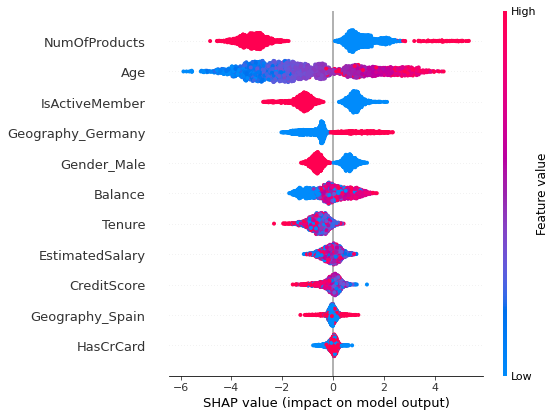

In [79]:
shap.initjs()

explainer = shap.TreeExplainer(catboost_tuned)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,)

In [80]:
catboost_tuned.predict_proba([814,27,5,10000,3,1,1,90000,0,0,1])


array([0.15734372, 0.84265628])

In [81]:
def efficient_cutoff(actual_value,predicted):
    '''
    Model probablity threshold cutoff plot
    :param  actual_value :  Actual  target values
    :param predicted: Predicted probabilities from the model
 

    :return: Train and Test Classification report and AUC- ROC Graph
    '''
    probability_cutoff = []
    accuracy_score_val = []
    recall_score_val=[]
    for i in range(30,50,2): ## Trying different probablity threshold values
        predicted_x = deepcopy(predicted)
        predicted_x[predicted_x >= i / 100] = 1 ## Classifying class 1 as greater than threshold
        predicted_x[predicted_x < i / 100] = 0 ## Classifying class 0 as less then threshold
        probability_cutoff.append(i/100)
        accuracy_score_val.append(accuracy_score(actual_value,predicted_x)) ## Calulating Accuracy Scores
        recall_score_val.append(recall_score(actual_value,predicted_x)) ##  Caluclating Recall Scores
        
    
    return (probability_cutoff,accuracy_score_val,recall_score_val)


In [82]:
pred= catboost_tuned.predict_proba(X_test)
efficient_cutoff(y_test,pred[:,1])
probability_cutoff,accuracy_score_val,recall_score_val=efficient_cutoff(y_test,pred[:,1])
    
fig = px.scatter( x=accuracy_score_val, y=recall_score_val,text=probability_cutoff, title='Threshold cutoff plot', labels={
                     "y":"Recall ",
                    "x": "Accuracy",
                     },)
fig.show()

- We can observe that 0.38 could be good threshold value to improve model further
